In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv('final.csv')

In [3]:
df

Restaurant              Reviewer  \
0      Beyond Flavours     Rusha Chakraborty   
1      Beyond Flavours  Anusha Tirumalaneedi   
2      Beyond Flavours       Ashok Shekhawat   
3      Beyond Flavours        Swapnil Sarkar   
4      Beyond Flavours                Dileep   
...                ...                   ...   
9995  Chinese Pavilion      Abhishek Mahajan   
9996  Chinese Pavilion        Sharad Agrawal   
9997  Chinese Pavilion             Ramandeep   
9998  Chinese Pavilion       Nayana Shanbhag   
9999  Chinese Pavilion      Bhargava Krishna   

                                                 Review Rating  \
0     the ambience was good food was quite good  had...      5   
1     ambience is too good for a pleasant evening se...      5   
2     a must try great food great ambience thnx for ...      5   
3     soumen das and arun was a great guy only becau...      5   
4     food is goodwe ordered kodi drumsticks and bas...      5   
...                                                 ...    ...   
9995  madhumathi mahajan well to start with nice cou...      3   
9996  this place has never disappointed us the food ...    4.5   
9997  bad rating is mainly because of chicken bone f...    1.5   
9998  i personally love and prefer chinese food had ...      4   
9999  checked in here to try some delicious chinese ...    3.5   

                          Metadata             Time  Pictures  
0           1 Review , 2 Followers  5/25/2019 15:54         0  
1          3 Reviews , 2 Followers  5/25/2019 14:20         0  
2          2 Reviews , 3 Followers  5/24/2019 22:54         0  
3            1 Review , 1 Follower  5/24/2019 22:11         0  
4          3 Reviews , 2 Followers  5/24/2019 21:37         0  
...                            ...              ...       ...  
9995     53 Reviews , 54 Followers    6/5/2016 0:08         0  
9996      2 Reviews , 53 Followers   6/4/2016 22:01         0  
9997    65 Reviews , 423 Followers   6/3/2016 10:37         3  
9998    13 Reviews , 144 Followers  5/31/2016 17:22         0  
9999  472 Reviews , 1302 Followers  5/31/2016 16:41         6  

[10000 rows x 7 columns]

In [4]:
df.columns.values

array(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'], dtype=object)

### Seperating Reviews and Follwers From Metadata

In [5]:
import re
def extract_reviews_and_followers(text):
    if isinstance(text, str):
        pattern = r'(\d+)\s*(?:Review)?(?:s)?\s*,?\s*(\d+)?\s*(?:Follower)?(?:s)?'  # Match Reviews and Followers
        match = re.match(pattern, text)
        if match:
            reviews = match.group(1)
            followers = match.group(2) if match.group(2) else '0'
            return pd.Series({'Reviews': reviews, 'Followers': followers})
    return pd.Series({'Reviews': text, 'Followers': '0'})
df[['Reviews', 'Followers']] = df['Metadata'].apply(extract_reviews_and_followers)

In [6]:
df.head(50)

Restaurant               Reviewer  \
0   Beyond Flavours      Rusha Chakraborty   
1   Beyond Flavours   Anusha Tirumalaneedi   
2   Beyond Flavours        Ashok Shekhawat   
3   Beyond Flavours         Swapnil Sarkar   
4   Beyond Flavours                 Dileep   
5   Beyond Flavours          Nagabhavani K   
6   Beyond Flavours        Jamuna Bhuwalka   
7   Beyond Flavours              Sandhya S   
8   Beyond Flavours           Akash Thorat   
9   Beyond Flavours         Smarak Patnaik   
10  Beyond Flavours       Saubhagya Bhuyan   
11  Beyond Flavours             Srivaths07   
12  Beyond Flavours            Kunj Mishra   
13  Beyond Flavours      Pradeep Vetapalem   
14  Beyond Flavours          Kankaria.ritu   
15  Beyond Flavours           Abhay Sharma   
16  Beyond Flavours        Shubham Jaiswal   
17  Beyond Flavours      Srijani Mukherjee   
18  Beyond Flavours            Hari Jangam   
19  Beyond Flavours            Suneet Soni   
20  Beyond Flavours      Little Chef Chika   
21  Beyond Flavours         Sneha Munigela   
22  Beyond Flavours           Sneha Sarkar   
23  Beyond Flavours                   Tony   
24  Beyond Flavours          Amritap Datta   
25  Beyond Flavours                Imteja7   
26  Beyond Flavours         Nisha Gahlawat   
27  Beyond Flavours         Dharini Hombal   
28  Beyond Flavours           Ankita Sinha   
29  Beyond Flavours               Ppck2412   
30  Beyond Flavours           Pragya Sarda   
31  Beyond Flavours                Anindya   
32  Beyond Flavours        Santhosh Reddyy   
33  Beyond Flavours       Piyali Mahapatra   
34  Beyond Flavours         Mehak Malhotra   
35  Beyond Flavours    Pradeep Kumar Gupta   
36  Beyond Flavours  Shubham Singh Chauhan   
37  Beyond Flavours            Prerna Mund   
38  Beyond Flavours          Pranith Patro   
39  Beyond Flavours          Sai Raj Kiran   
40  Beyond Flavours                 Razeen   
41  Beyond Flavours               Prasanna   
42  Beyond Flavours          Jeevith Reddy   
43  Beyond Flavours        Sugandha Saxena   
44  Beyond Flavours              Singh.ibm   
45  Beyond Flavours                Sind Hu   
46  Beyond Flavours           Sameer Singh   
47  Beyond Flavours        Jaya Phaneendra   
48  Beyond Flavours     Gokulnath Kunjumon   
49  Beyond Flavours              Raj Verma   

                                               Review Rating  \
0   the ambience was good food was quite good  had...      5   
1   ambience is too good for a pleasant evening se...      5   
2   a must try great food great ambience thnx for ...      5   
3   soumen das and arun was a great guy only becau...      5   
4   food is goodwe ordered kodi drumsticks and bas...      5   
5   ambiance is good service is good food is aprad...      5   
6   its a very nice place ambience is different al...      5   
7   well after reading so many reviews finally vis...      4   
8   excellent food  specially if you like spicy fo...      5   
9   came for the birthday treat of a close friend ...      5   
10  the service was great and the food was awesome...      5   
11  very good ambience amazing food good service a...      5   
12  food was very good soup was as expected in sta...      5   
13  food is too good telangana kodiak fry is must ...      5   
14  we ordered corn cheese balls manchow soup and ...      1   
15  food and ambience is fantastic waiter manav ma...      5   
16  came here for lunch and the food was good and ...      4   
17  the best thing about this place is the food my...      5   
18  polite and friendly staff nice ambience and go...      5   
19  food is really good we had vegetarian items in...      5   
20  beautiful cozy and classy at the same time thi...      5   
21  please was good but it was quite expensive and...      4   
22  service was too good and fast even these peopl...      4   
23  we had our farewell feast here recently enjoye...      5   
24  excellent experience mouthwatering food good a...      5  

In [7]:
df.drop(columns=['Metadata'], inplace=True)

In [8]:
df

Restaurant              Reviewer  \
0      Beyond Flavours     Rusha Chakraborty   
1      Beyond Flavours  Anusha Tirumalaneedi   
2      Beyond Flavours       Ashok Shekhawat   
3      Beyond Flavours        Swapnil Sarkar   
4      Beyond Flavours                Dileep   
...                ...                   ...   
9995  Chinese Pavilion      Abhishek Mahajan   
9996  Chinese Pavilion        Sharad Agrawal   
9997  Chinese Pavilion             Ramandeep   
9998  Chinese Pavilion       Nayana Shanbhag   
9999  Chinese Pavilion      Bhargava Krishna   

                                                 Review Rating  \
0     the ambience was good food was quite good  had...      5   
1     ambience is too good for a pleasant evening se...      5   
2     a must try great food great ambience thnx for ...      5   
3     soumen das and arun was a great guy only becau...      5   
4     food is goodwe ordered kodi drumsticks and bas...      5   
...                                                 ...    ...   
9995  madhumathi mahajan well to start with nice cou...      3   
9996  this place has never disappointed us the food ...    4.5   
9997  bad rating is mainly because of chicken bone f...    1.5   
9998  i personally love and prefer chinese food had ...      4   
9999  checked in here to try some delicious chinese ...    3.5   

                 Time  Pictures Reviews Followers  
0     5/25/2019 15:54         0       1         2  
1     5/25/2019 14:20         0       3         2  
2     5/24/2019 22:54         0       2         3  
3     5/24/2019 22:11         0       1         1  
4     5/24/2019 21:37         0       3         2  
...               ...       ...     ...       ...  
9995    6/5/2016 0:08         0      53        54  
9996   6/4/2016 22:01         0       2        53  
9997   6/3/2016 10:37         3      65       423  
9998  5/31/2016 17:22         0      13       144  
9999  5/31/2016 16:41         6     472      1302  

[10000 rows x 8 columns]

### Splitting Date And Time 

In [9]:
df[['Date', 'Time']] = df['Time'].str.split(' ', expand=True)

In [10]:
df

Restaurant              Reviewer  \
0      Beyond Flavours     Rusha Chakraborty   
1      Beyond Flavours  Anusha Tirumalaneedi   
2      Beyond Flavours       Ashok Shekhawat   
3      Beyond Flavours        Swapnil Sarkar   
4      Beyond Flavours                Dileep   
...                ...                   ...   
9995  Chinese Pavilion      Abhishek Mahajan   
9996  Chinese Pavilion        Sharad Agrawal   
9997  Chinese Pavilion             Ramandeep   
9998  Chinese Pavilion       Nayana Shanbhag   
9999  Chinese Pavilion      Bhargava Krishna   

                                                 Review Rating   Time  \
0     the ambience was good food was quite good  had...      5  15:54   
1     ambience is too good for a pleasant evening se...      5  14:20   
2     a must try great food great ambience thnx for ...      5  22:54   
3     soumen das and arun was a great guy only becau...      5  22:11   
4     food is goodwe ordered kodi drumsticks and bas...      5  21:37   
...                                                 ...    ...    ...   
9995  madhumathi mahajan well to start with nice cou...      3   0:08   
9996  this place has never disappointed us the food ...    4.5  22:01   
9997  bad rating is mainly because of chicken bone f...    1.5  10:37   
9998  i personally love and prefer chinese food had ...      4  17:22   
9999  checked in here to try some delicious chinese ...    3.5  16:41   

      Pictures Reviews Followers       Date  
0            0       1         2  5/25/2019  
1            0       3         2  5/25/2019  
2            0       2         3  5/24/2019  
3            0       1         1  5/24/2019  
4            0       3         2  5/24/2019  
...        ...     ...       ...        ...  
9995         0      53        54   6/5/2016  
9996         0       2        53   6/4/2016  
9997         3      65       423   6/3/2016  
9998         0      13       144  5/31/2016  
9999         6     472      1302  5/31/2016  

[10000 rows x 9 columns]

In [11]:
df.drop(columns=['Time'], inplace=True)

In [12]:
df

Restaurant              Reviewer  \
0      Beyond Flavours     Rusha Chakraborty   
1      Beyond Flavours  Anusha Tirumalaneedi   
2      Beyond Flavours       Ashok Shekhawat   
3      Beyond Flavours        Swapnil Sarkar   
4      Beyond Flavours                Dileep   
...                ...                   ...   
9995  Chinese Pavilion      Abhishek Mahajan   
9996  Chinese Pavilion        Sharad Agrawal   
9997  Chinese Pavilion             Ramandeep   
9998  Chinese Pavilion       Nayana Shanbhag   
9999  Chinese Pavilion      Bhargava Krishna   

                                                 Review Rating  Pictures  \
0     the ambience was good food was quite good  had...      5         0   
1     ambience is too good for a pleasant evening se...      5         0   
2     a must try great food great ambience thnx for ...      5         0   
3     soumen das and arun was a great guy only becau...      5         0   
4     food is goodwe ordered kodi drumsticks and bas...      5         0   
...                                                 ...    ...       ...   
9995  madhumathi mahajan well to start with nice cou...      3         0   
9996  this place has never disappointed us the food ...    4.5         0   
9997  bad rating is mainly because of chicken bone f...    1.5         3   
9998  i personally love and prefer chinese food had ...      4         0   
9999  checked in here to try some delicious chinese ...    3.5         6   

     Reviews Followers       Date  
0          1         2  5/25/2019  
1          3         2  5/25/2019  
2          2         3  5/24/2019  
3          1         1  5/24/2019  
4          3         2  5/24/2019  
...      ...       ...        ...  
9995      53        54   6/5/2016  
9996       2        53   6/4/2016  
9997      65       423   6/3/2016  
9998      13       144  5/31/2016  
9999     472      1302  5/31/2016  

[10000 rows x 8 columns]

### Seperating Date values into Day Month And Year

In [13]:
df[['Month', 'Day', 'Year']] = df['Date'].str.split('/', expand=True)

In [14]:
df

Restaurant              Reviewer  \
0      Beyond Flavours     Rusha Chakraborty   
1      Beyond Flavours  Anusha Tirumalaneedi   
2      Beyond Flavours       Ashok Shekhawat   
3      Beyond Flavours        Swapnil Sarkar   
4      Beyond Flavours                Dileep   
...                ...                   ...   
9995  Chinese Pavilion      Abhishek Mahajan   
9996  Chinese Pavilion        Sharad Agrawal   
9997  Chinese Pavilion             Ramandeep   
9998  Chinese Pavilion       Nayana Shanbhag   
9999  Chinese Pavilion      Bhargava Krishna   

                                                 Review Rating  Pictures  \
0     the ambience was good food was quite good  had...      5         0   
1     ambience is too good for a pleasant evening se...      5         0   
2     a must try great food great ambience thnx for ...      5         0   
3     soumen das and arun was a great guy only becau...      5         0   
4     food is goodwe ordered kodi drumsticks and bas...      5         0   
...                                                 ...    ...       ...   
9995  madhumathi mahajan well to start with nice cou...      3         0   
9996  this place has never disappointed us the food ...    4.5         0   
9997  bad rating is mainly because of chicken bone f...    1.5         3   
9998  i personally love and prefer chinese food had ...      4         0   
9999  checked in here to try some delicious chinese ...    3.5         6   

     Reviews Followers       Date Month Day  Year  
0          1         2  5/25/2019     5  25  2019  
1          3         2  5/25/2019     5  25  2019  
2          2         3  5/24/2019     5  24  2019  
3          1         1  5/24/2019     5  24  2019  
4          3         2  5/24/2019     5  24  2019  
...      ...       ...        ...   ...  ..   ...  
9995      53        54   6/5/2016     6   5  2016  
9996       2        53   6/4/2016     6   4  2016  
9997      65       423   6/3/2016     6   3  2016  
9998      13       144  5/31/2016     5  31  2016  
9999     472      1302  5/31/2016     5  31  2016  

[10000 rows x 11 columns]

In [15]:
df.drop(columns=['Date'], inplace=True)

In [16]:
df['Day'].unique()

array(['25', '24', '23', '22', '21', '20', '19', '18', '17', '16', '15',
       '14', '12', '11', '10', '9', '8', '7', '6', '5', '4', '3', '2',
       '13', '1', '30', '29', '28', '27', '26', '31', nan], dtype=object)

In [17]:
df['Month'].unique()

array(['5', '4', '3', '2', '1', '12', '11', '10', '9', '8', '7', '6', nan],
      dtype=object)

In [18]:
df

Restaurant              Reviewer  \
0      Beyond Flavours     Rusha Chakraborty   
1      Beyond Flavours  Anusha Tirumalaneedi   
2      Beyond Flavours       Ashok Shekhawat   
3      Beyond Flavours        Swapnil Sarkar   
4      Beyond Flavours                Dileep   
...                ...                   ...   
9995  Chinese Pavilion      Abhishek Mahajan   
9996  Chinese Pavilion        Sharad Agrawal   
9997  Chinese Pavilion             Ramandeep   
9998  Chinese Pavilion       Nayana Shanbhag   
9999  Chinese Pavilion      Bhargava Krishna   

                                                 Review Rating  Pictures  \
0     the ambience was good food was quite good  had...      5         0   
1     ambience is too good for a pleasant evening se...      5         0   
2     a must try great food great ambience thnx for ...      5         0   
3     soumen das and arun was a great guy only becau...      5         0   
4     food is goodwe ordered kodi drumsticks and bas...      5         0   
...                                                 ...    ...       ...   
9995  madhumathi mahajan well to start with nice cou...      3         0   
9996  this place has never disappointed us the food ...    4.5         0   
9997  bad rating is mainly because of chicken bone f...    1.5         3   
9998  i personally love and prefer chinese food had ...      4         0   
9999  checked in here to try some delicious chinese ...    3.5         6   

     Reviews Followers Month Day  Year  
0          1         2     5  25  2019  
1          3         2     5  25  2019  
2          2         3     5  24  2019  
3          1         1     5  24  2019  
4          3         2     5  24  2019  
...      ...       ...   ...  ..   ...  
9995      53        54     6   5  2016  
9996       2        53     6   4  2016  
9997      65       423     6   3  2016  
9998      13       144     5  31  2016  
9999     472      1302     5  31  2016  

[10000 rows x 10 columns]

In [19]:
df.drop(columns=['Day'], inplace=True)

In [20]:
df

Restaurant              Reviewer  \
0      Beyond Flavours     Rusha Chakraborty   
1      Beyond Flavours  Anusha Tirumalaneedi   
2      Beyond Flavours       Ashok Shekhawat   
3      Beyond Flavours        Swapnil Sarkar   
4      Beyond Flavours                Dileep   
...                ...                   ...   
9995  Chinese Pavilion      Abhishek Mahajan   
9996  Chinese Pavilion        Sharad Agrawal   
9997  Chinese Pavilion             Ramandeep   
9998  Chinese Pavilion       Nayana Shanbhag   
9999  Chinese Pavilion      Bhargava Krishna   

                                                 Review Rating  Pictures  \
0     the ambience was good food was quite good  had...      5         0   
1     ambience is too good for a pleasant evening se...      5         0   
2     a must try great food great ambience thnx for ...      5         0   
3     soumen das and arun was a great guy only becau...      5         0   
4     food is goodwe ordered kodi drumsticks and bas...      5         0   
...                                                 ...    ...       ...   
9995  madhumathi mahajan well to start with nice cou...      3         0   
9996  this place has never disappointed us the food ...    4.5         0   
9997  bad rating is mainly because of chicken bone f...    1.5         3   
9998  i personally love and prefer chinese food had ...      4         0   
9999  checked in here to try some delicious chinese ...    3.5         6   

     Reviews Followers Month  Year  
0          1         2     5  2019  
1          3         2     5  2019  
2          2         3     5  2019  
3          1         1     5  2019  
4          3         2     5  2019  
...      ...       ...   ...   ...  
9995      53        54     6  2016  
9996       2        53     6  2016  
9997      65       423     6  2016  
9998      13       144     5  2016  
9999     472      1302     5  2016  

[10000 rows x 9 columns]

In [21]:
df.shape

(10000, 9)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9944 non-null   object
 3   Rating      9962 non-null   object
 4   Pictures    10000 non-null  int64 
 5   Reviews     9962 non-null   object
 6   Followers   10000 non-null  object
 7   Month       9962 non-null   object
 8   Year        9962 non-null   object
dtypes: int64(1), object(8)
memory usage: 703.2+ KB


In [23]:
df.isnull().sum()

Restaurant     0
Reviewer      38
Review        56
Rating        38
Pictures       0
Reviews       38
Followers      0
Month         38
Year          38
dtype: int64

In [24]:
null_reviewer_rows = df[df['Reviewer'].isnull()]


In [25]:
null_reviewer_rows

Restaurant Reviewer Review Rating  Pictures Reviews Followers  \
8777  American Wild Wings      NaN    NaN    NaN         0     NaN         0   
8778  American Wild Wings      NaN    NaN    NaN         0     NaN         0   
8779  American Wild Wings      NaN    NaN    NaN         0     NaN         0   
8780  American Wild Wings      NaN    NaN    NaN         0     NaN         0   
8781  American Wild Wings      NaN    NaN    NaN         0     NaN         0   
8782  American Wild Wings      NaN    NaN    NaN         0     NaN         0   
8783  American Wild Wings      NaN    NaN    NaN         0     NaN         0   
8784  American Wild Wings      NaN    NaN    NaN         0     NaN         0   
8785  American Wild Wings      NaN    NaN    NaN         0     NaN         0   
8786  American Wild Wings      NaN    NaN    NaN         0     NaN         0   
8787  American Wild Wings      NaN    NaN    NaN         0     NaN         0   
8788  American Wild Wings      NaN    NaN    NaN         0     NaN         0   
8789  American Wild Wings      NaN    NaN    NaN         0     NaN         0   
8790  American Wild Wings      NaN    NaN    NaN         0     NaN         0   
8791  American Wild Wings      NaN    NaN    NaN         0     NaN         0   
8792  American Wild Wings      NaN    NaN    NaN         0     NaN         0   
8793  American Wild Wings      NaN    NaN    NaN         0     NaN         0   
8794  American Wild Wings      NaN    NaN    NaN         0     NaN         0   
8795  American Wild Wings      NaN    NaN    NaN         0     NaN         0   
8796  American Wild Wings      NaN    NaN    NaN         0     NaN         0   
8797  American Wild Wings      NaN    NaN    NaN         0     NaN         0   
8798  American Wild Wings      NaN    NaN    NaN         0     NaN         0   
8799  American Wild Wings      NaN    NaN    NaN         0     NaN         0   
9085         Arena Eleven      NaN    NaN    NaN         0     NaN         0   
9086         Arena Eleven      NaN    NaN    NaN         0     NaN         0   
9087         Arena Eleven      NaN    NaN    NaN         0     NaN         0   
9088         Arena Eleven      NaN    NaN    NaN         0     NaN         0   
9089         Arena Eleven      NaN    NaN    NaN         0     NaN         0   
9090         Arena Eleven      NaN    NaN    NaN         0     NaN         0   
9091         Arena Eleven      NaN    NaN    NaN         0     NaN         0   
9092         Arena Eleven      NaN    NaN    NaN         0     NaN         0   
9093         Arena Eleven      NaN    NaN    NaN         0     NaN         0   
9094         Arena Eleven      NaN    NaN    NaN         0     NaN         0   
9095         Arena Eleven      NaN    NaN    NaN         0     NaN         0   
9096         Arena Eleven      NaN    NaN    NaN         0     NaN         0   
9097         Arena Eleven      NaN    NaN    NaN         0     NaN         0   
9098         Arena Eleven      NaN    NaN    NaN         0     NaN         0   
9099         Arena Eleven      NaN    NaN    NaN         0     NaN         0   

     Month Year  
8777   NaN  NaN  
8778   NaN  NaN  
8779   NaN  NaN  
8780   NaN  NaN  
8781   NaN  NaN  
8782   NaN  NaN  
8783   NaN  NaN  
8784   NaN  NaN  
8785   NaN  NaN  
8786   NaN  NaN  
8787   NaN  NaN  
8788   NaN  NaN  
8789   NaN  NaN  
8790   NaN  NaN  
8791   NaN  NaN  
8792   NaN  NaN  
8793   NaN  NaN  
8794   NaN  NaN  
8795   NaN  NaN  
8796   NaN  NaN  
8797   NaN  NaN  
8798   NaN  NaN  
8799   NaN  NaN  
9085   NaN  NaN  
9086   NaN  NaN  
9087   NaN  NaN  
9088   NaN  NaN  
9089   NaN  NaN  
9090   NaN  NaN  
9091   NaN  NaN  
9092   NaN  NaN  
9093   NaN  NaN  
9094   NaN  NaN  
9095   NaN  NaN  
9096   NaN  NaN  
9097   NaN  NaN  
9098   NaN  NaN  
9099   NaN  NaN

There are some rows which have completely null values so rather than using it for analysis we can completely remove it as it is of no use for our analysis

In [26]:
df.dropna(subset=['Reviewer'], inplace=True)


In [27]:
df.isnull().sum()

Restaurant     0
Reviewer       0
Review        18
Rating         0
Pictures       0
Reviews        0
Followers      0
Month          0
Year           0
dtype: int64

In [28]:
df['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like'],
      dtype=object)

The Like value has no meaning to the Rating and on the other side there are very few of its type so its better to remove it off

In [29]:
df['Rating'] = df['Rating'].replace('Like', pd.NA)
df.dropna(subset=['Rating'], inplace=True)
df['Rating'] = df['Rating'].astype(float)

In [30]:
null_review_rows = df[df['Review'].isnull()]

In [31]:
null_review_rows

Restaurant                Reviewer Review  \
1583                                    KFC                 Tasleem    NaN   
2360                                   Amul        Lakshmi Narayana    NaN   
3784                    Kritunga Restaurant      Pallavi Proddatoor    NaN   
4573                            Owm Nom Nom             Sai Krishna    NaN   
4582                            Owm Nom Nom     Suneetha Bhumireddy    NaN   
5280                      Biryanis And More                Vedantha    NaN   
5799                           Being Hungry                   Surya    NaN   
6260  Shree Santosh Dhaba Family Restaurant              Sudha Rani    NaN   
6274  Shree Santosh Dhaba Family Restaurant           Naveen Chanti    NaN   
6281  Shree Santosh Dhaba Family Restaurant           Rahul Agrawal    NaN   
6449                        Hyderabad Chefs          Madhurimanne97    NaN   
6489                        Hyderabad Chefs                  Harsha    NaN   
6659                           Aromas@11SIX    Madhavi Kanikicharla    NaN   
7954                           Olive Garden  ARUGULLA PRAVEEN KUMAR    NaN   
8228                     Al Saba Restaurant                  Suresh    NaN   
8830                         Domino's Pizza            Sarthak Shah    NaN   
8844                         Domino's Pizza             Sayan Gupta    NaN   
9597                             Desi Bytes                Srinivas    NaN   

      Rating  Pictures Reviews Followers Month  Year  
1583     5.0         0       0         0     7  2018  
2360     5.0         0       0         0     7  2018  
3784     5.0         0       0         0     7  2018  
4573     5.0         0       0         0     7  2018  
4582     5.0         0       1         0     7  2018  
5280     5.0         0       1         0     7  2018  
5799     5.0         0       4         4     7  2018  
6260     3.0         0       1         1     7  2018  
6274     5.0         0       1         1     7  2018  
6281     5.0         0       1         1     7  2018  
6449     5.0         0       1         0     7  2018  
6489     5.0         0       1         0     7  2018  
6659     5.0         0       1         1     8  2018  
7954     3.0         0       1         1     8  2018  
8228     5.0         0       1         0     7  2018  
8830     4.0         0       2         4     9  2018  
8844     5.0         0       2         2     8  2018  
9597     1.0         0       5         1     4  2018

In [32]:
df.dropna(subset=['Review'], inplace=True)


In [33]:
df['Rating'].unique()

array([5. , 4. , 1. , 3. , 2. , 3.5, 4.5, 2.5, 1.5])

In [34]:
df.isnull().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        0
Pictures      0
Reviews       0
Followers     0
Month         0
Year          0
dtype: int64

In [35]:
df.dtypes

Restaurant     object
Reviewer       object
Review         object
Rating        float64
Pictures        int64
Reviews        object
Followers      object
Month          object
Year           object
dtype: object

Converting the necessary columns from object to int32

In [36]:
df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Followers'] = df['Followers'].astype(int)
df['Reviews'] = df['Reviews'].astype(int)

Creating a new column which is 'Quarter' that can help in more detailed analysis on quarterly basis

In [37]:
def get_quarter(Month):
    if Month in range(1, 5):
        return 'Q1'
    elif Month in range(5, 9):
        return 'Q2'
    elif Month in range(9, 13):
        return 'Q3'
    else:
        return 'Unknown'
df['Quarter'] = df['Month'].apply(get_quarter)

In [38]:
df.shape

(9943, 10)

In [39]:
df2 = df.copy()

In [41]:
df2

Restaurant              Reviewer  \
0      Beyond Flavours     Rusha Chakraborty   
1      Beyond Flavours  Anusha Tirumalaneedi   
2      Beyond Flavours       Ashok Shekhawat   
3      Beyond Flavours        Swapnil Sarkar   
4      Beyond Flavours                Dileep   
...                ...                   ...   
9995  Chinese Pavilion      Abhishek Mahajan   
9996  Chinese Pavilion        Sharad Agrawal   
9997  Chinese Pavilion             Ramandeep   
9998  Chinese Pavilion       Nayana Shanbhag   
9999  Chinese Pavilion      Bhargava Krishna   

                                                 Review  Rating  Pictures  \
0     the ambience was good, food was quite good . h...     5.0         0   
1     ambience is too good for a pleasant evening. s...     5.0         0   
2     a must try.. great food great ambience. thnx f...     5.0         0   
3     soumen das and arun was a great guy. only beca...     5.0         0   
4     food is good.we ordered kodi drumsticks and ba...     5.0         0   
...                                                 ...     ...       ...   
9995  madhumathi mahajan well to start with nice cou...     3.0         0   
9996  this place has never disappointed us.. the foo...     4.5         0   
9997  bad rating is mainly because of "chicken bone ...     1.5         3   
9998  i personally love and prefer chinese food. had...     4.0         0   
9999  checked in here to try some delicious chinese ...     3.5         6   

      Reviews  Followers  Month  Year Quarter  
0           1          2      5  2019      Q2  
1           3          2      5  2019      Q2  
2           2          3      5  2019      Q2  
3           1          1      5  2019      Q2  
4           3          2      5  2019      Q2  
...       ...        ...    ...   ...     ...  
9995       53         54      6  2016      Q2  
9996        2         53      6  2016      Q2  
9997       65        423      6  2016      Q2  
9998       13        144      5  2016      Q2  
9999      472       1302      5  2016      Q2  

[9954 rows x 10 columns]

### WordCloud

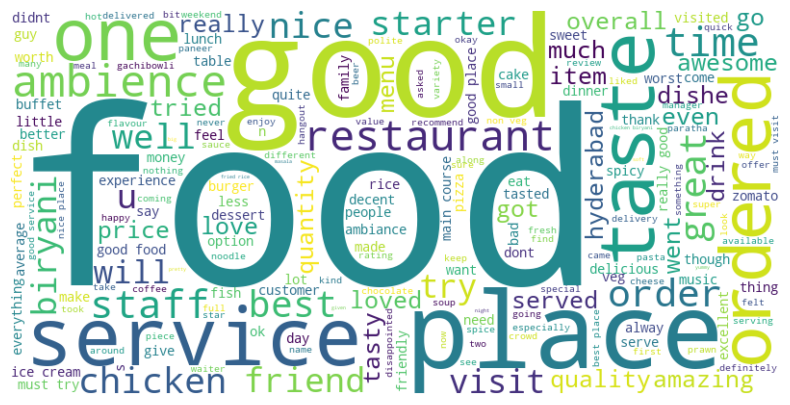

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = ' '.join(df2['Review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### Top 20 words by frequency

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aryan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


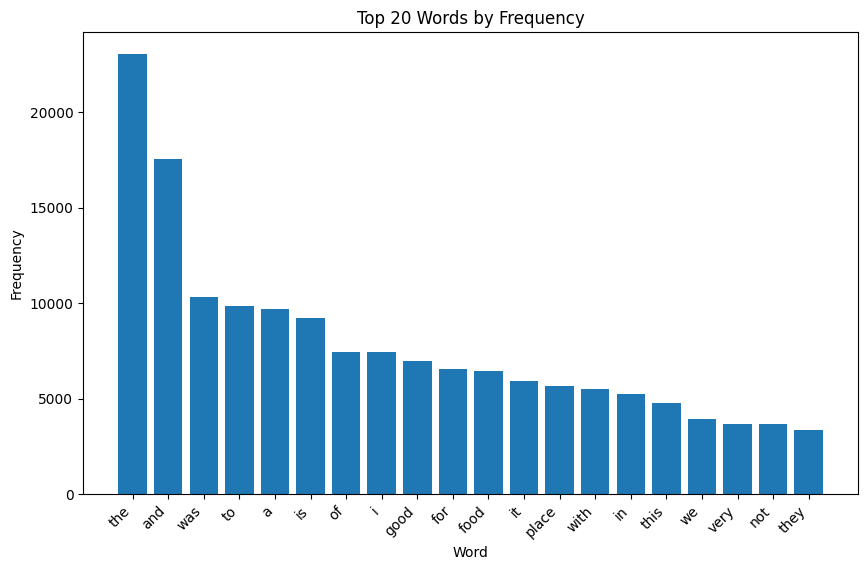

      Word  Frequency
0      the      23036
23     and      17547
2      was      10307
43      to       9869
14       a       9706
32      is       9242
65      of       7447
71       i       7446
3     good       7004
13     for       6547
4     food       6433
226     it       5951
12   place       5662
21    with       5495
58      in       5226
75    this       4761
89      we       3950
37    very       3698
127    not       3664
129   they       3369


In [41]:
from nltk.tokenize import word_tokenize
from collections import Counter
import nltk
nltk.download('punkt')
tokens = df2['Review'].apply(word_tokenize)
all_words = [word for sublist in tokens for word in sublist]
word_freq = Counter(all_words)
word_freq_df = pd.DataFrame(list(word_freq.items()), columns=['Word', 'Frequency'])
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)
top_words = word_freq_df.head(20)
plt.figure(figsize=(10, 6))
plt.bar(top_words['Word'], top_words['Frequency'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 20 Words by Frequency')
plt.show()
print(word_freq_df.head(20))


With the help of it we can understand which all words are most frequently used by the customers as here good,food, place are some of the words that are heavily used in reviews 

### Top 10 high frequency words for each restuarants

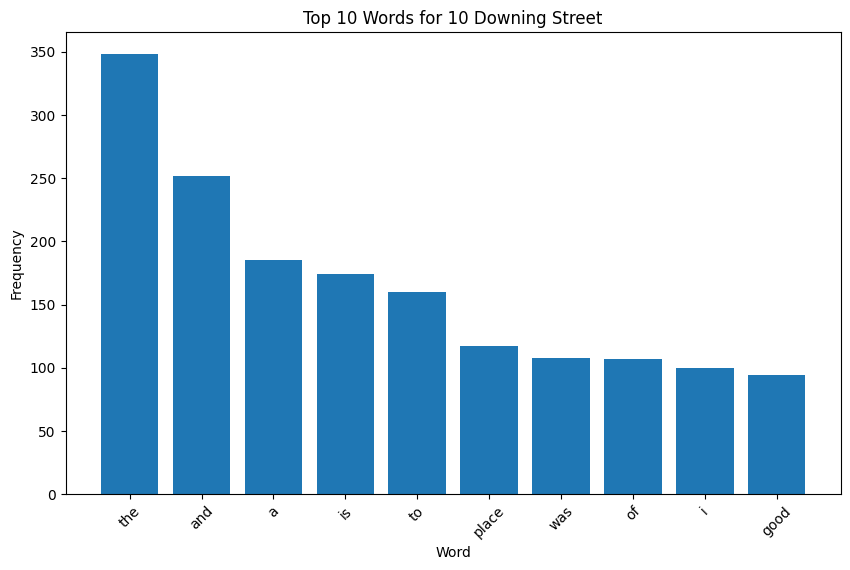

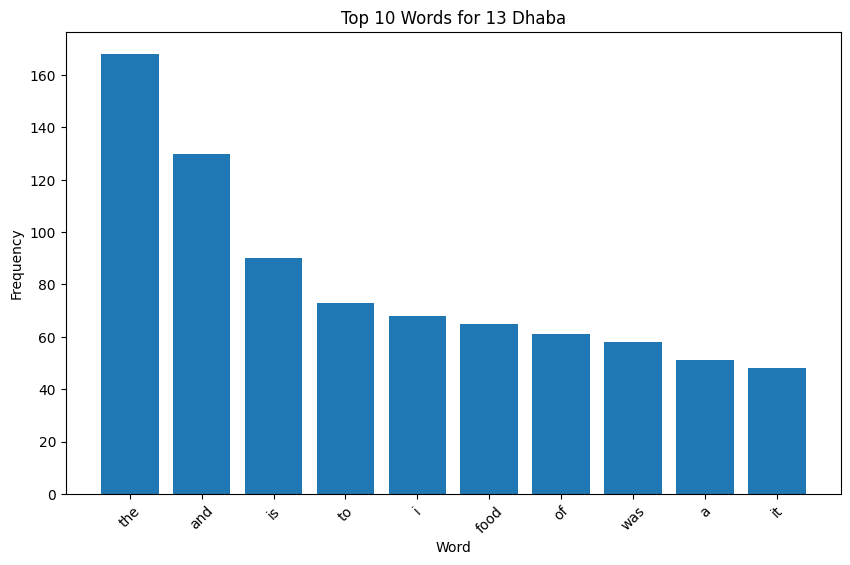

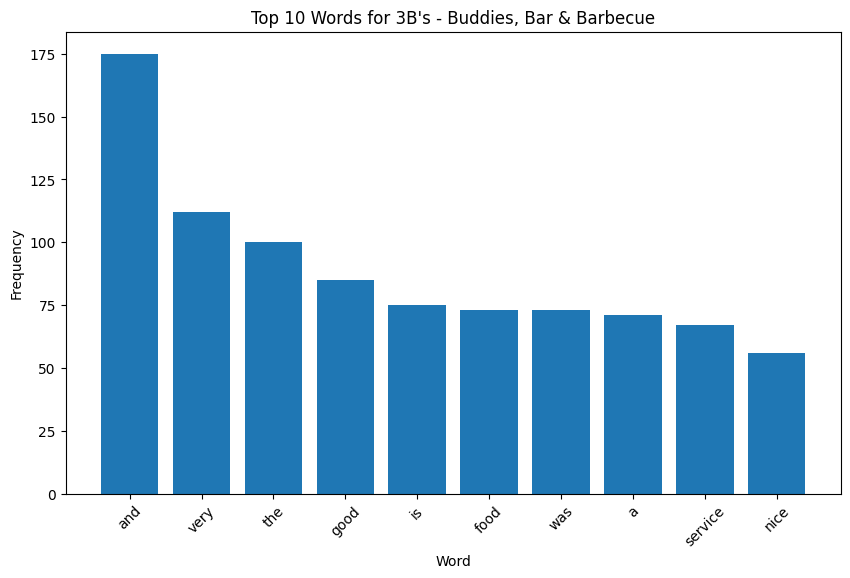

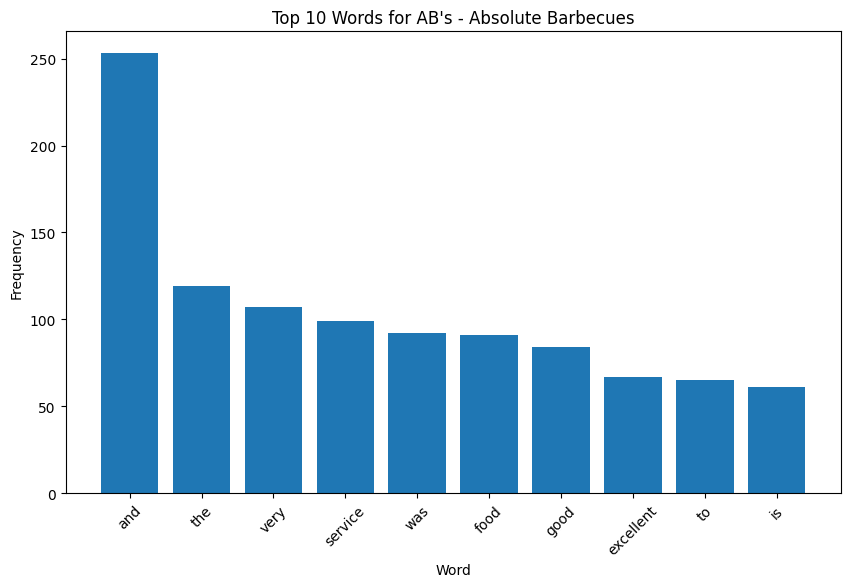

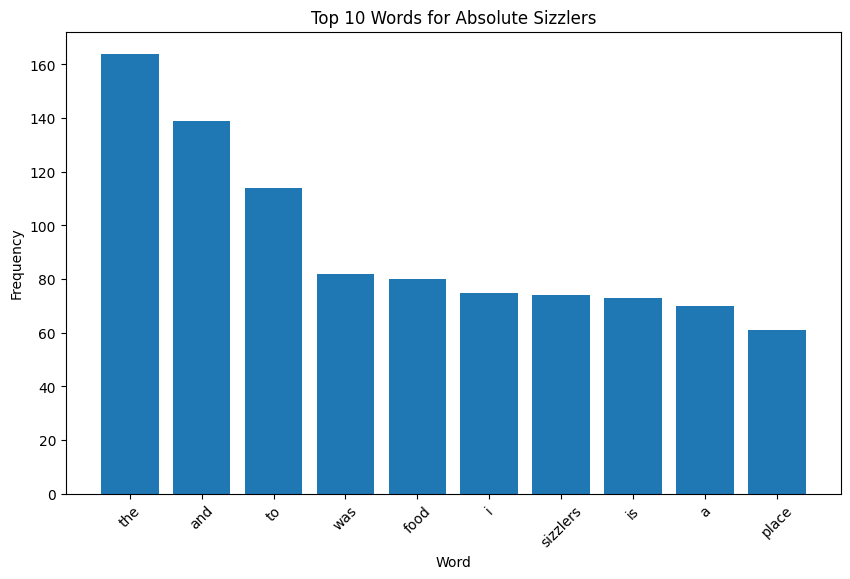

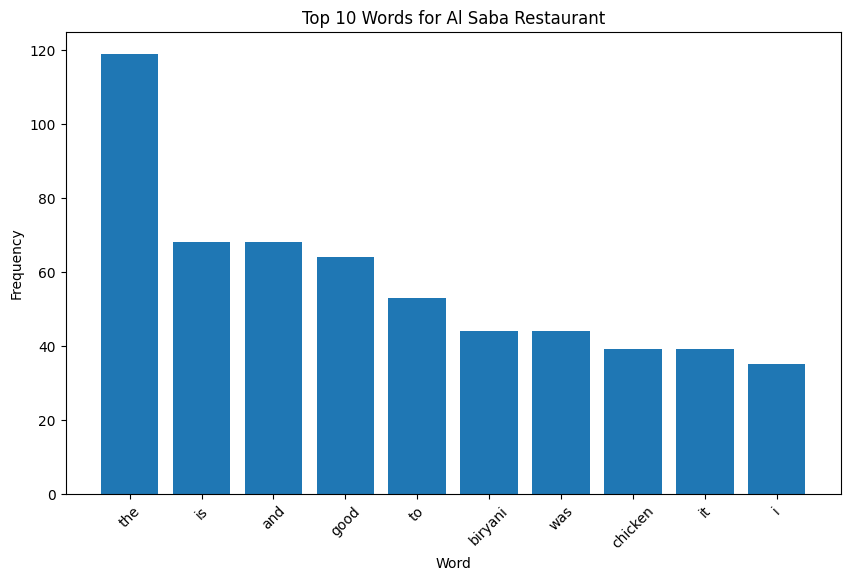

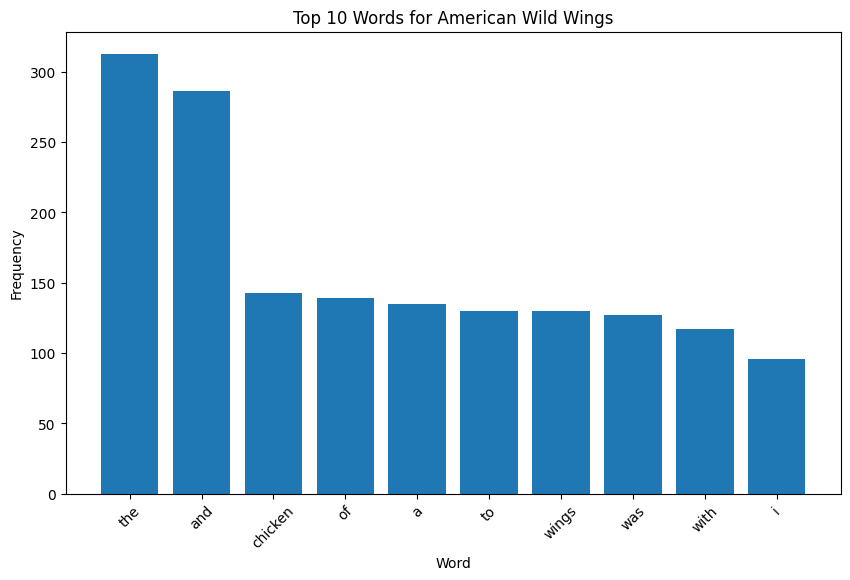

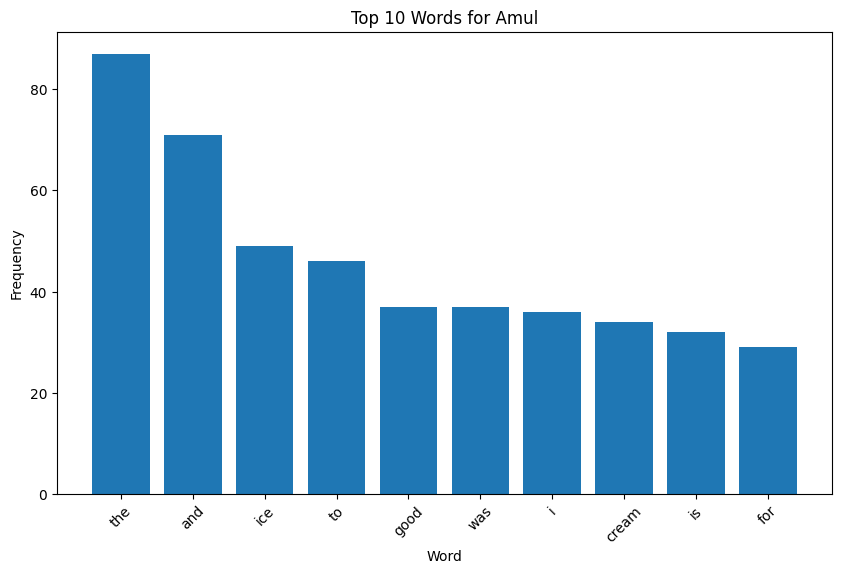

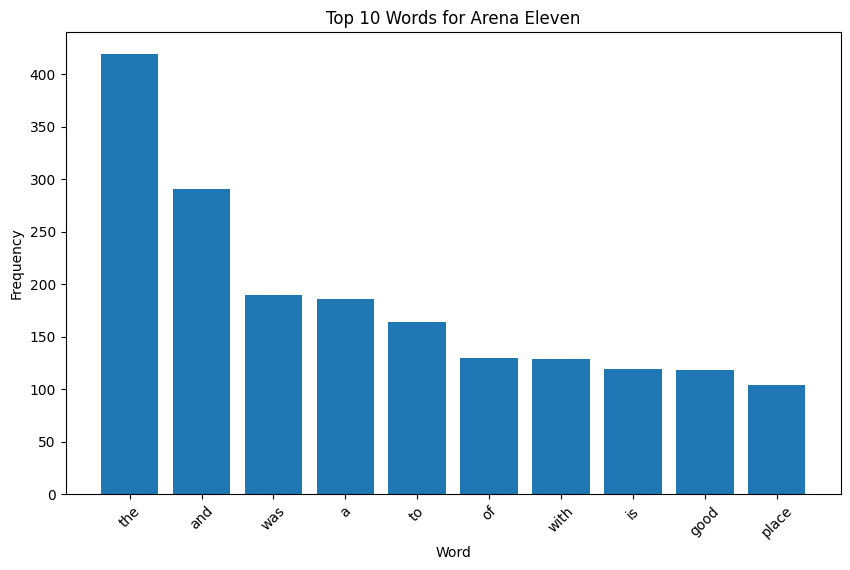

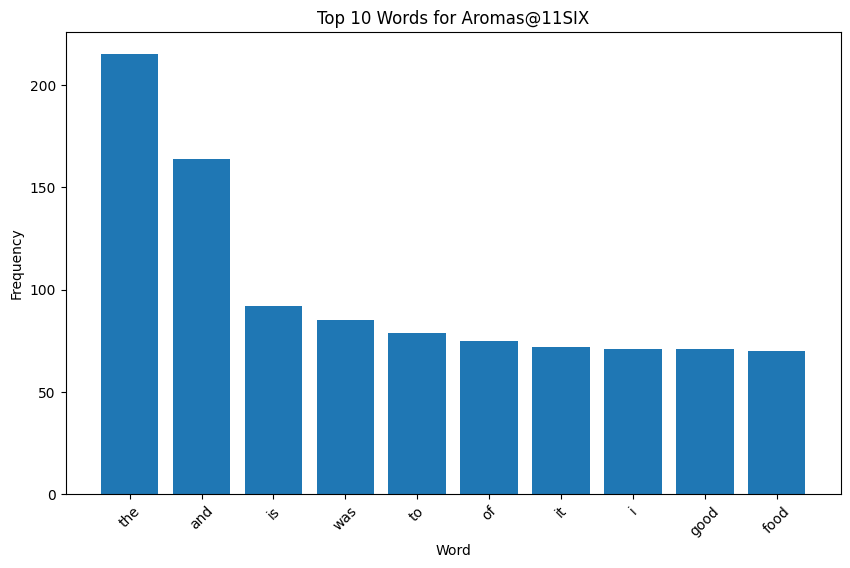

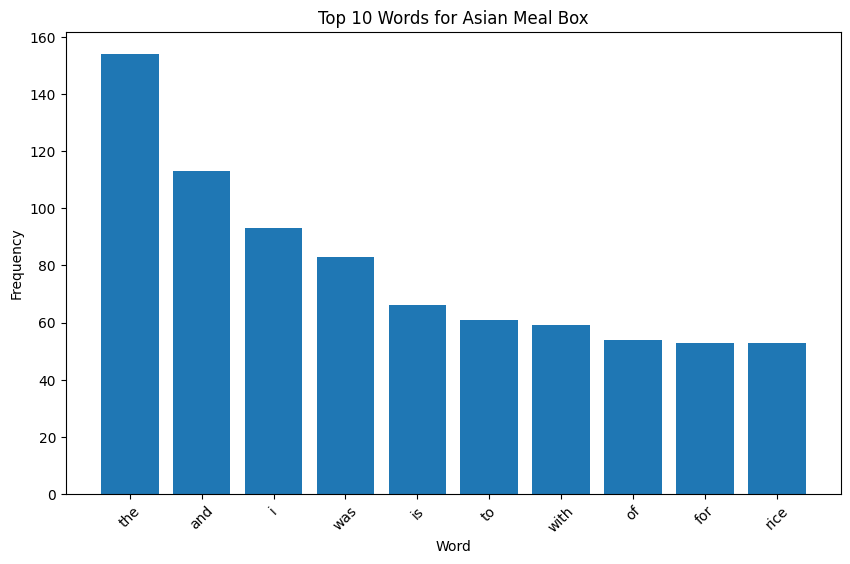

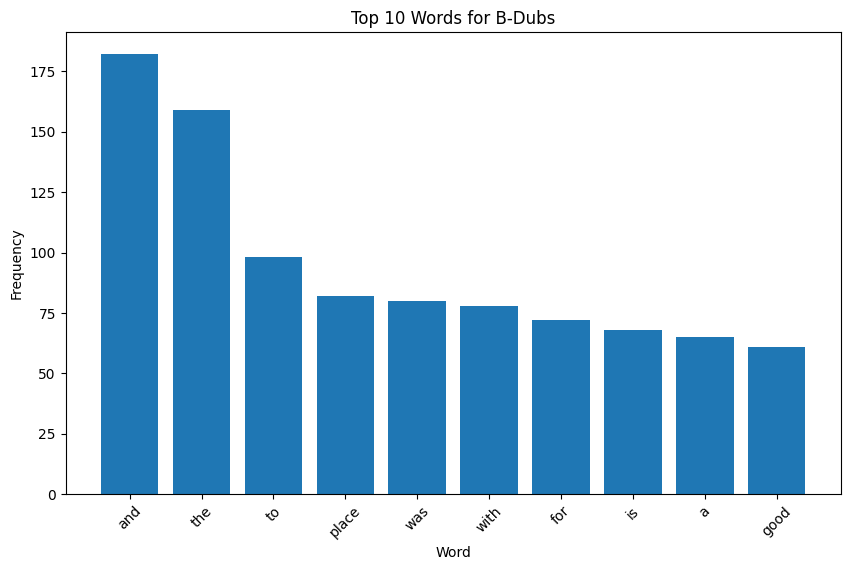

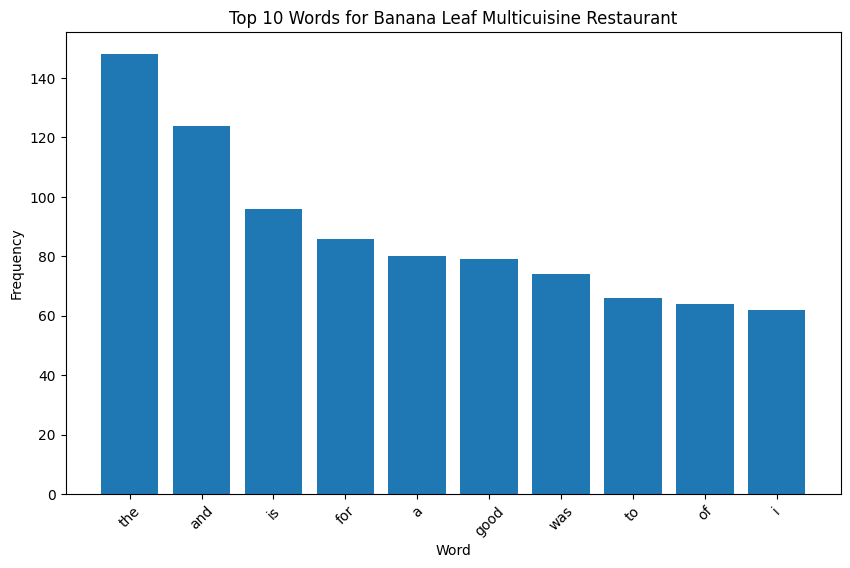

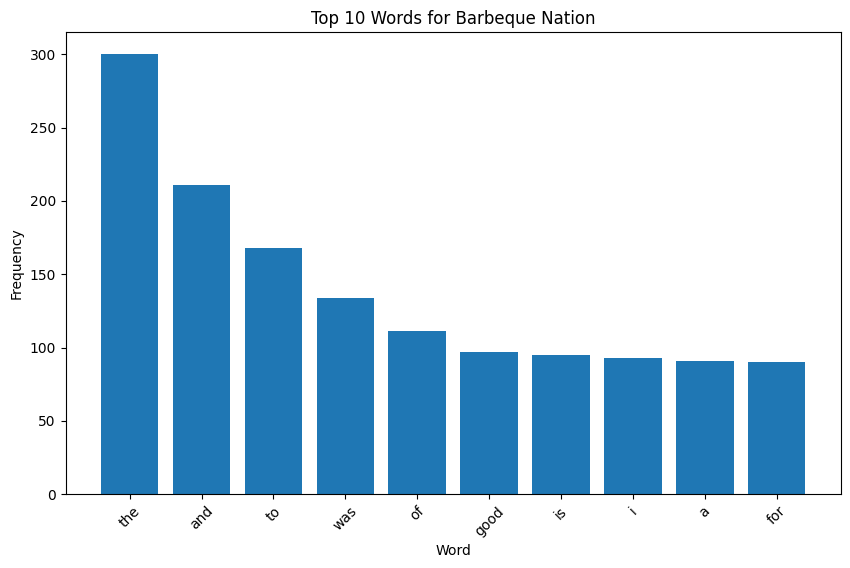

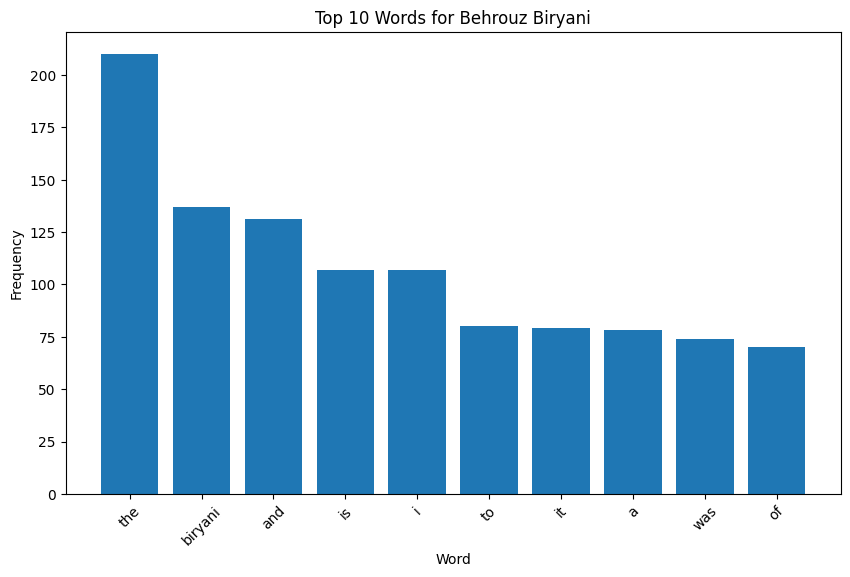

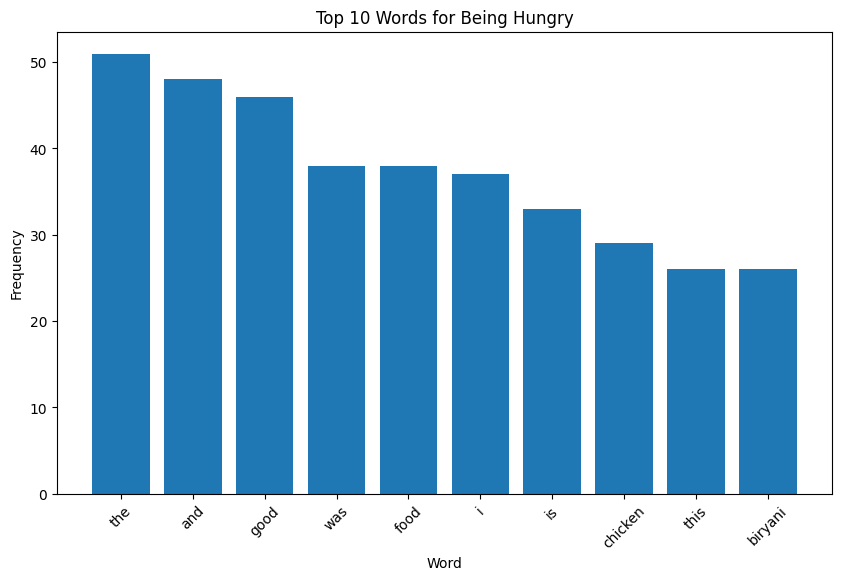

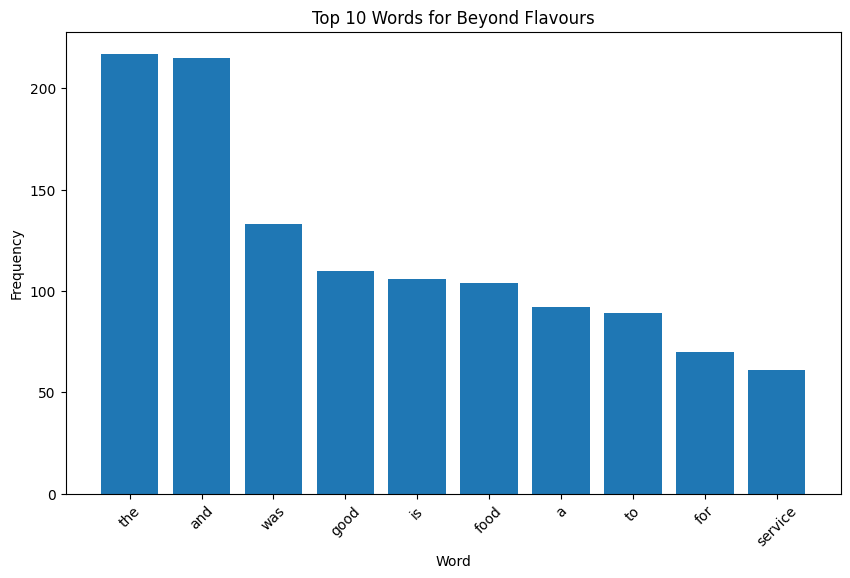

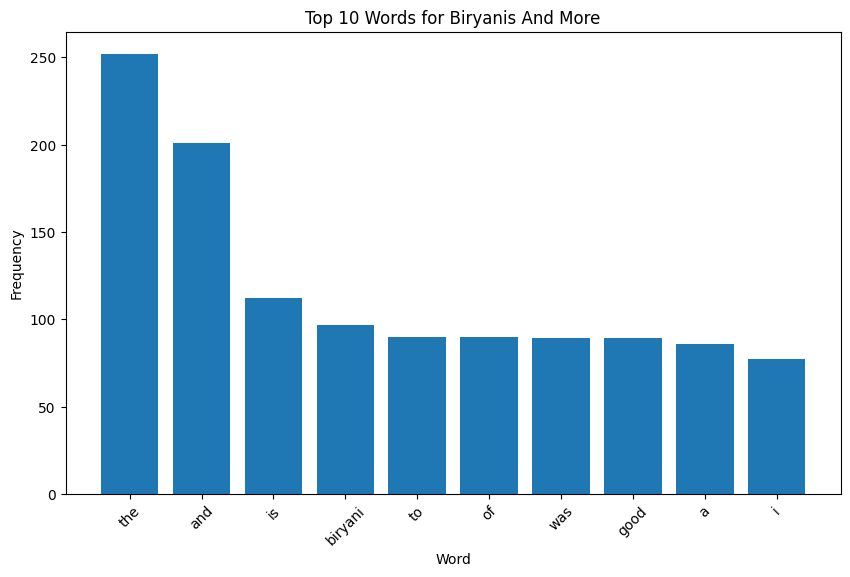

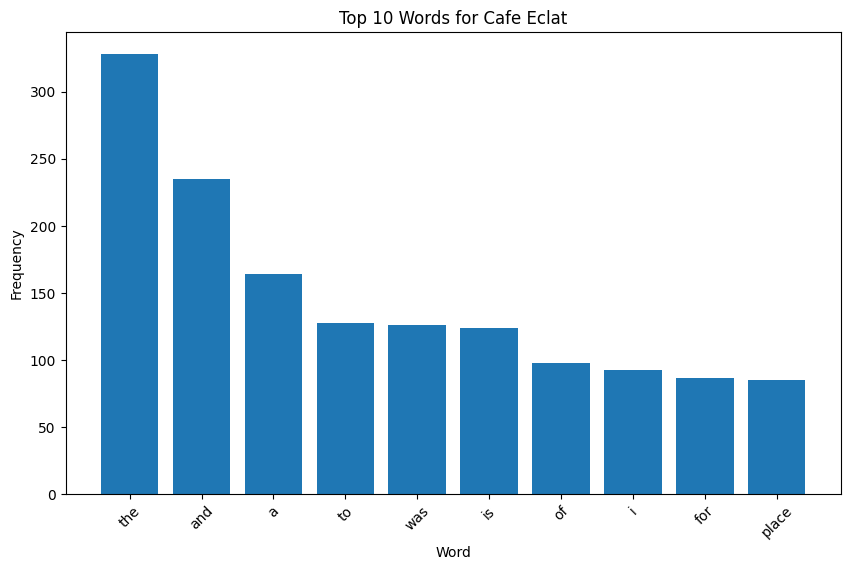

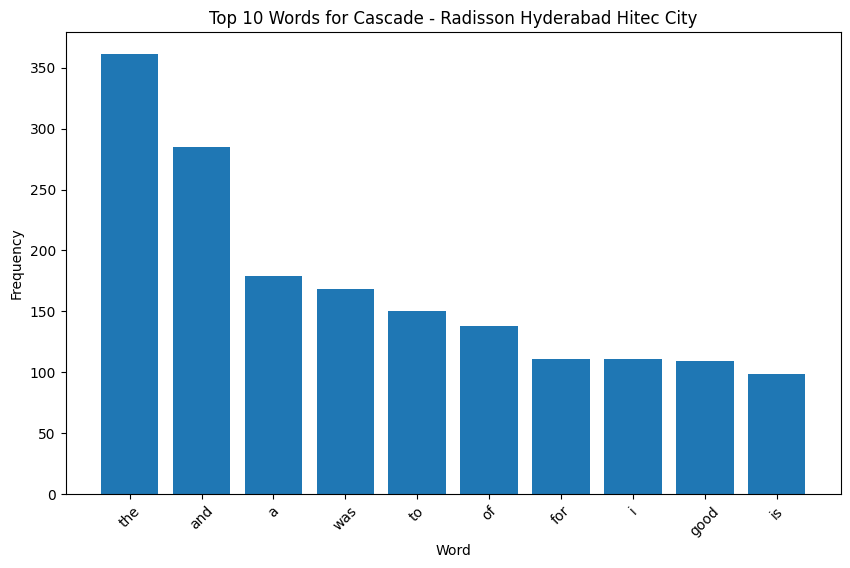

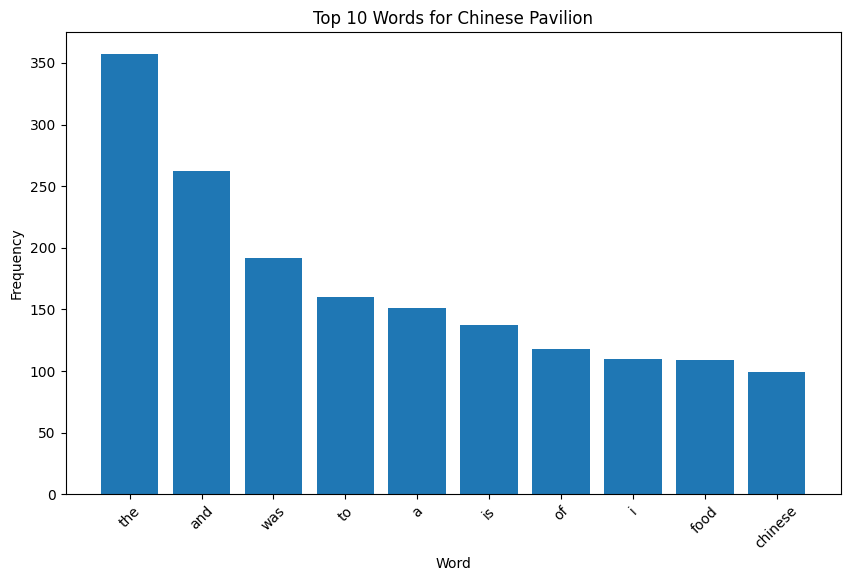

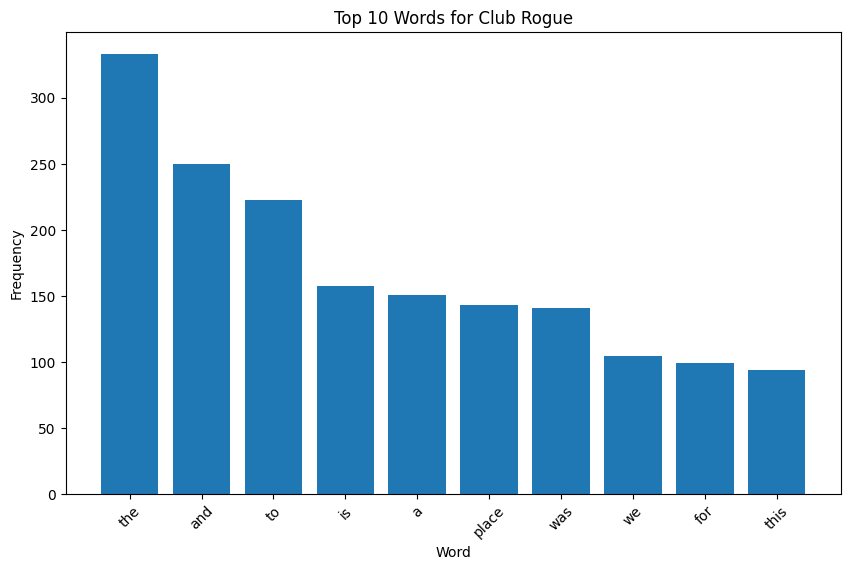

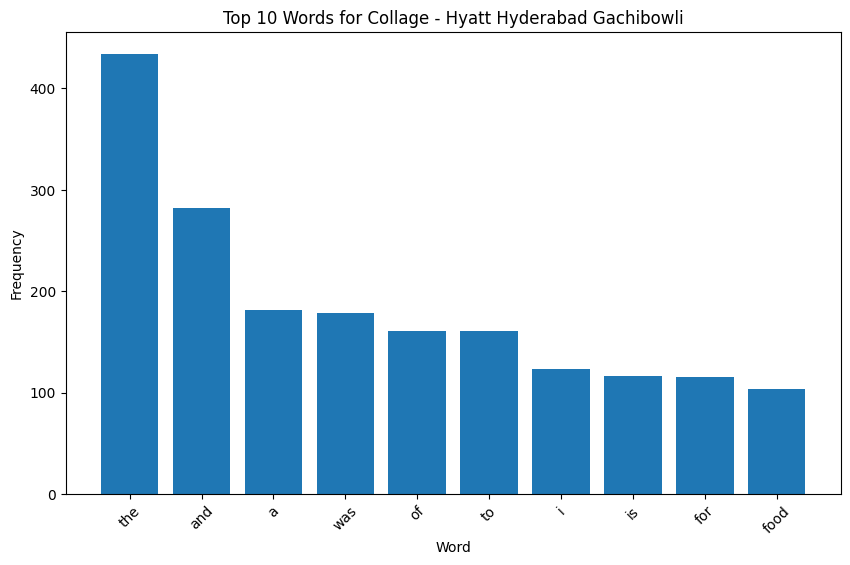

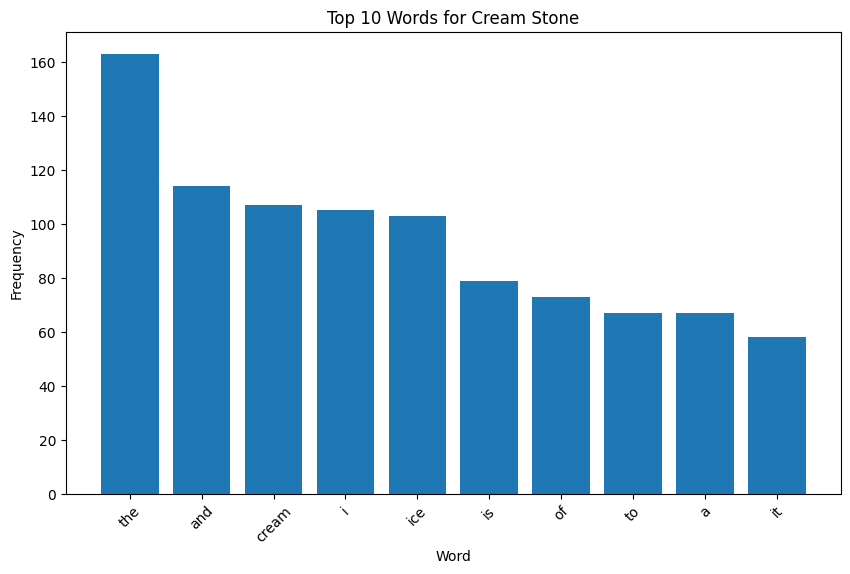

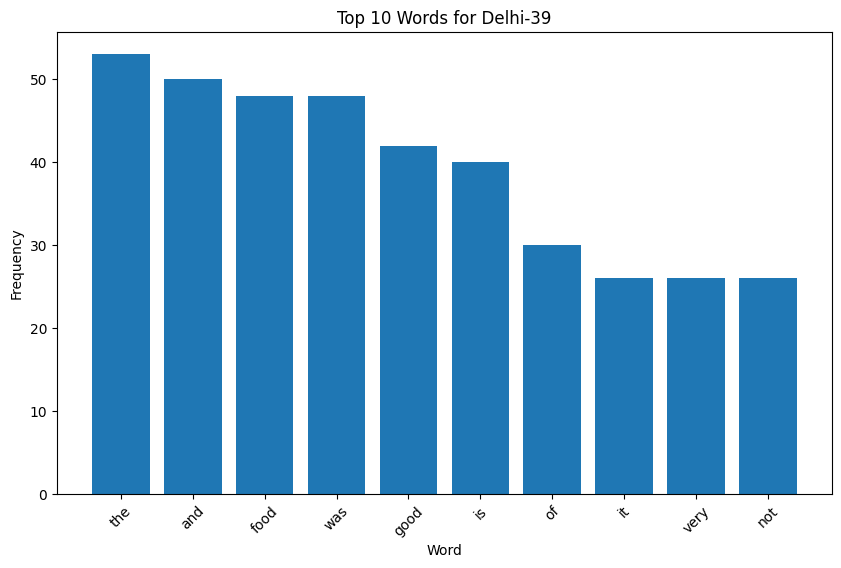

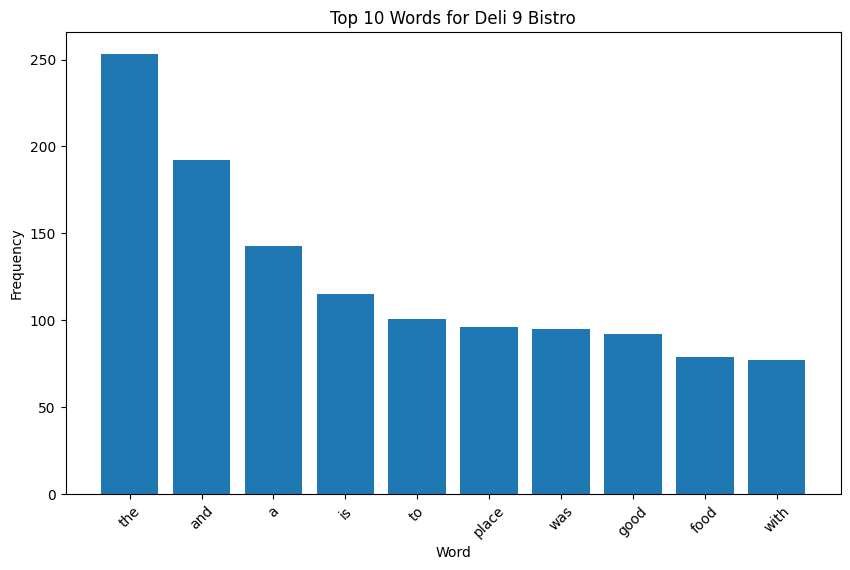

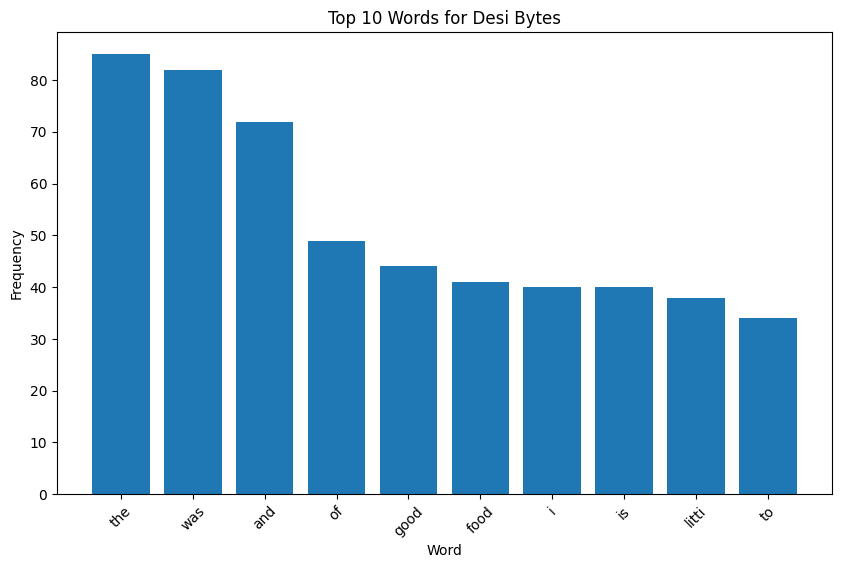

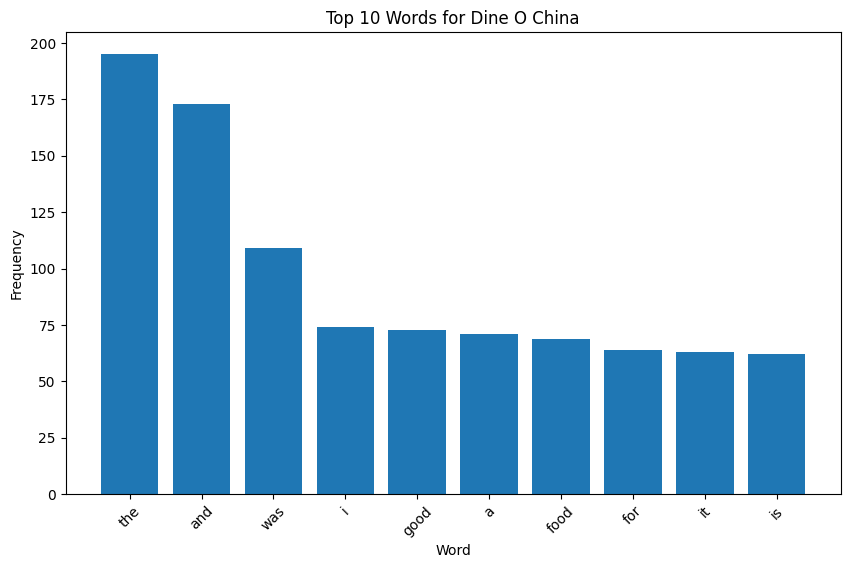

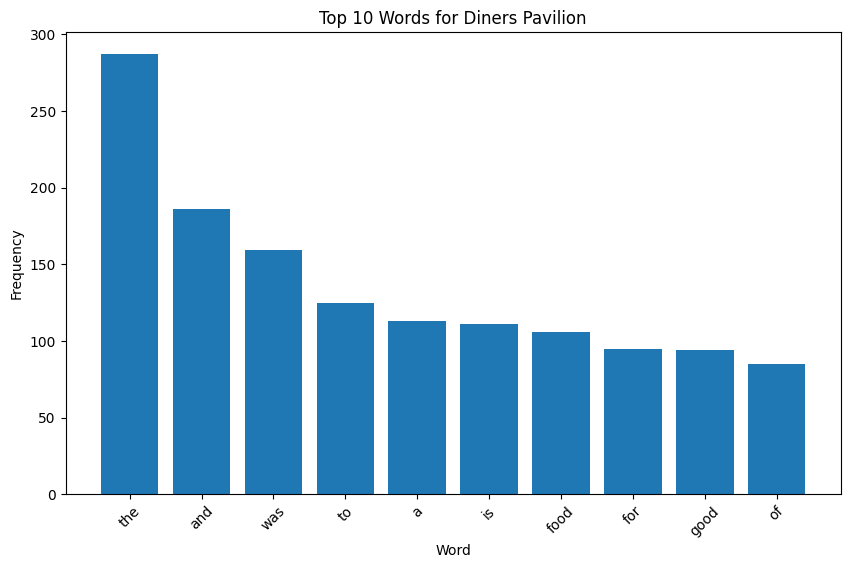

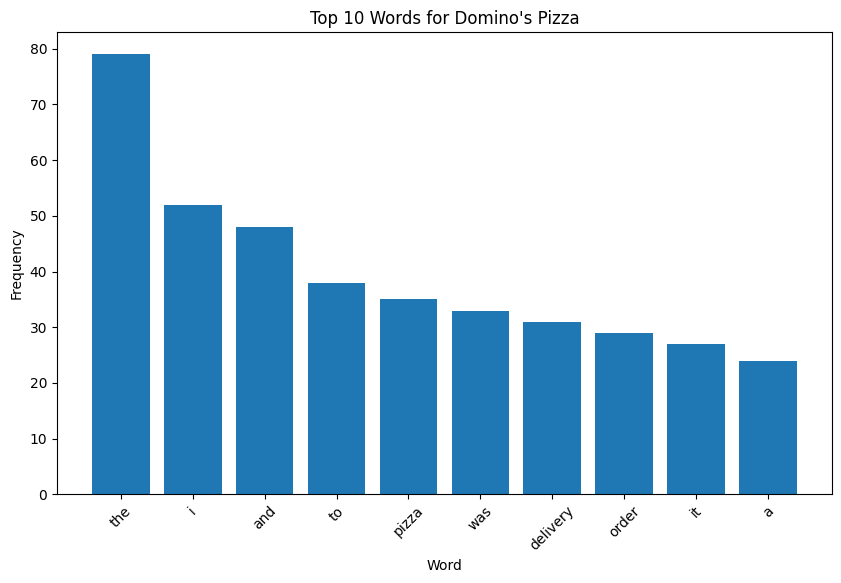

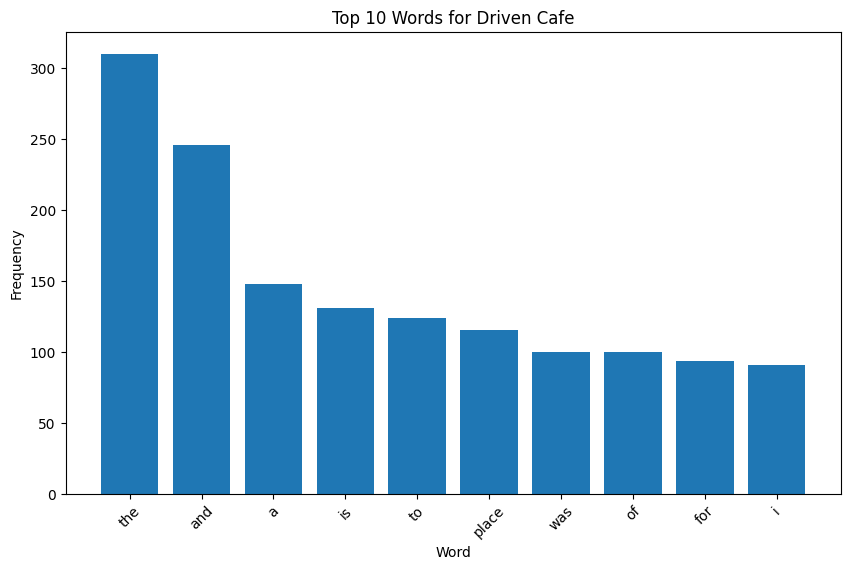

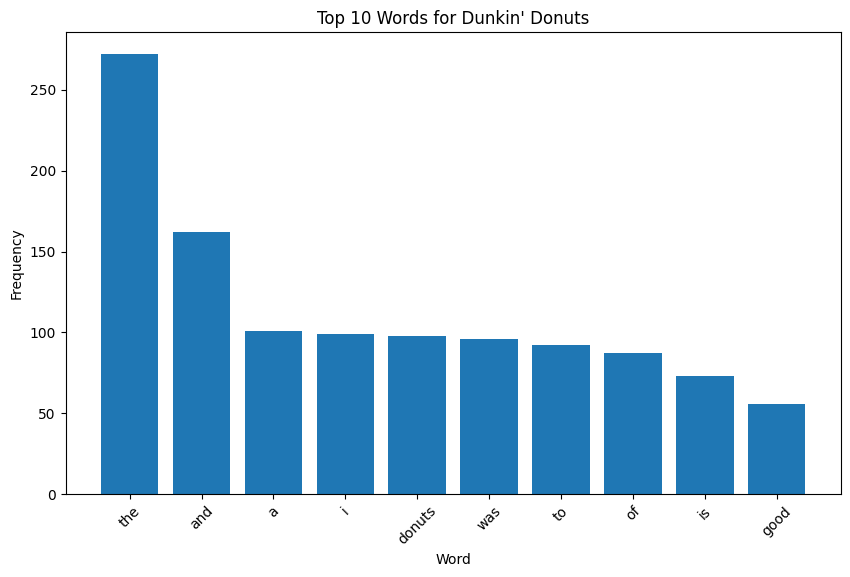

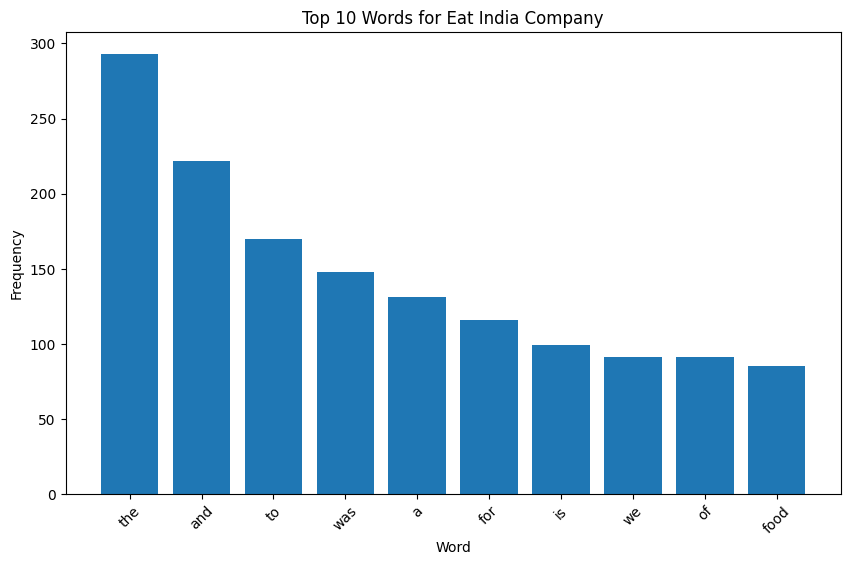

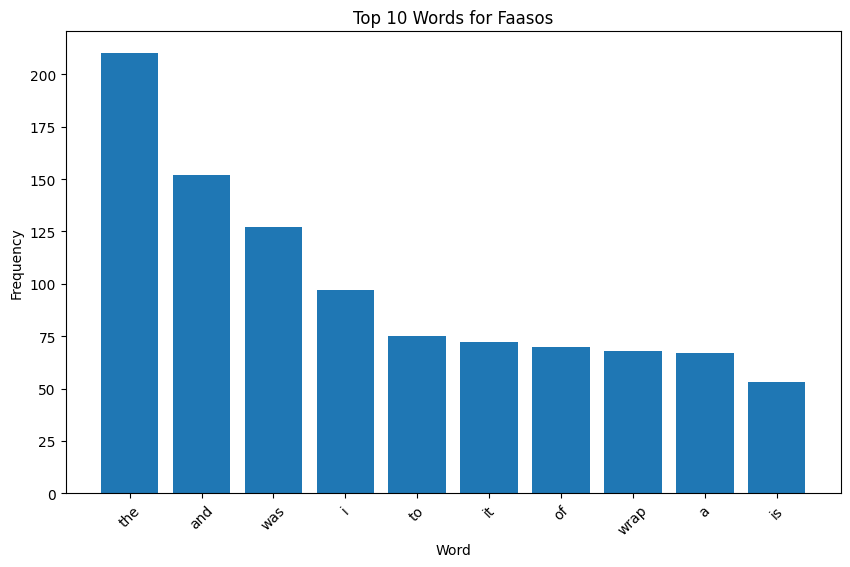

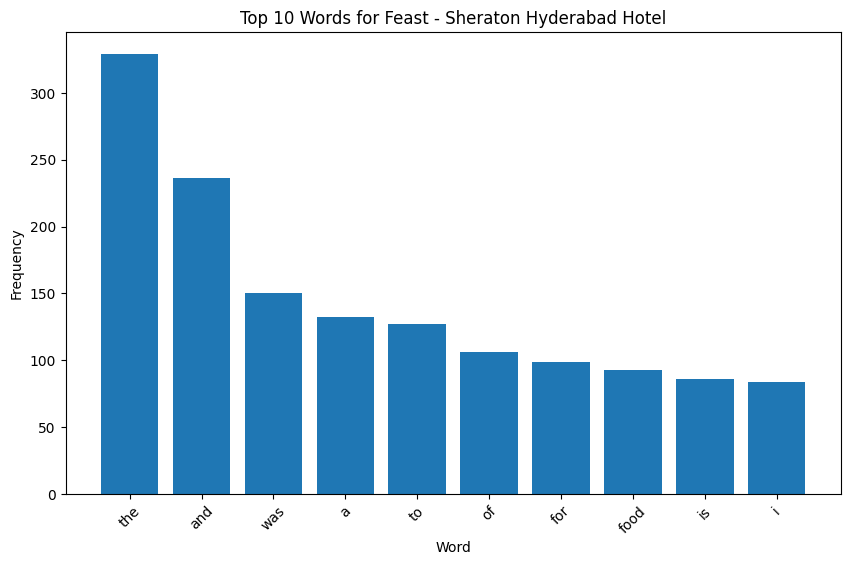

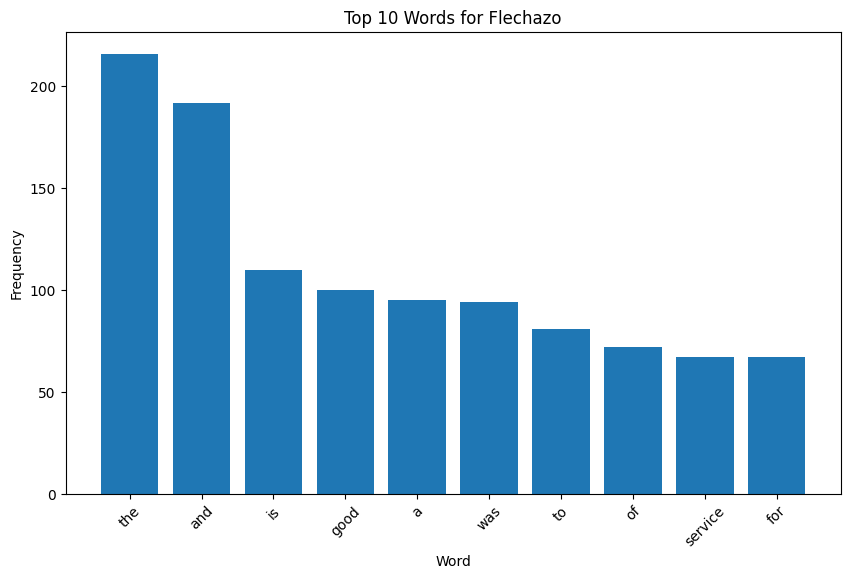

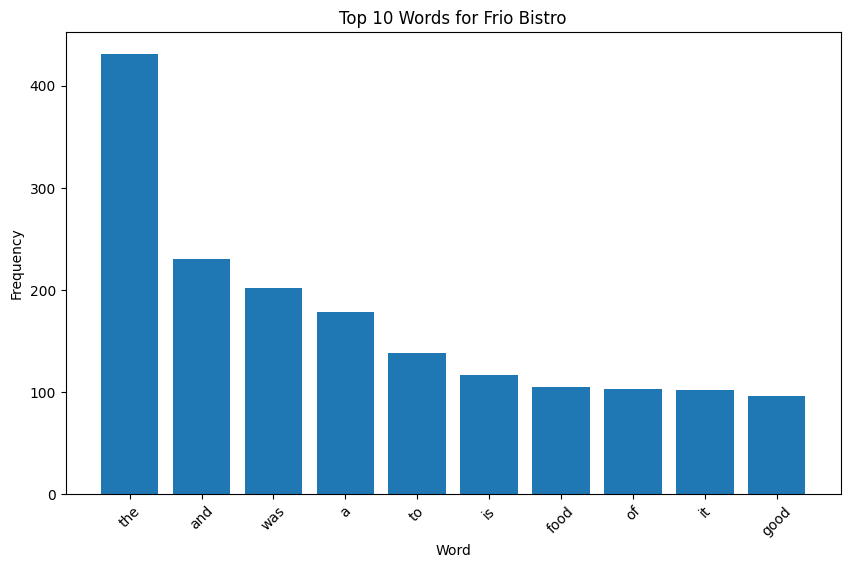

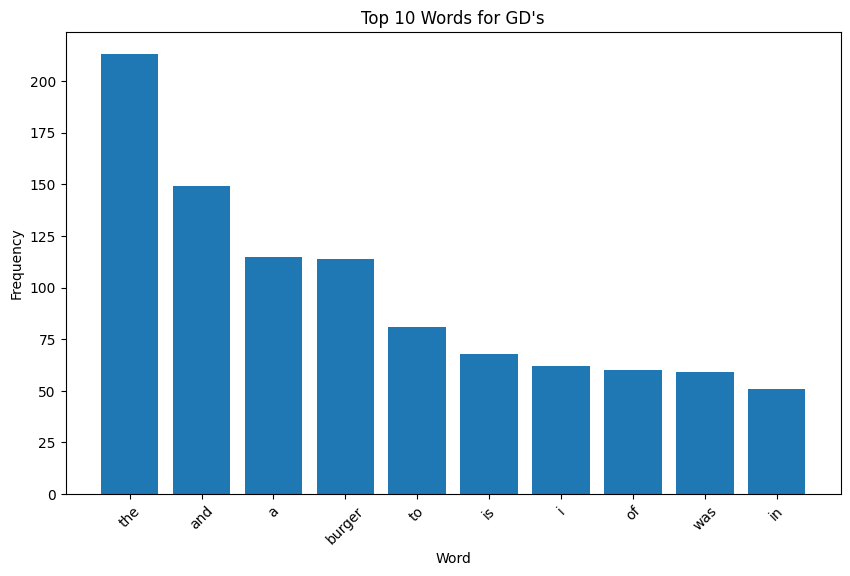

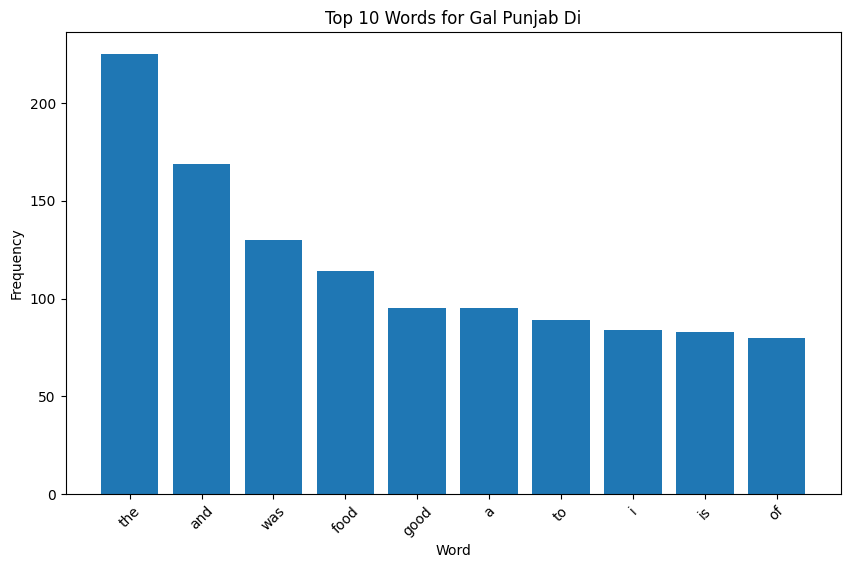

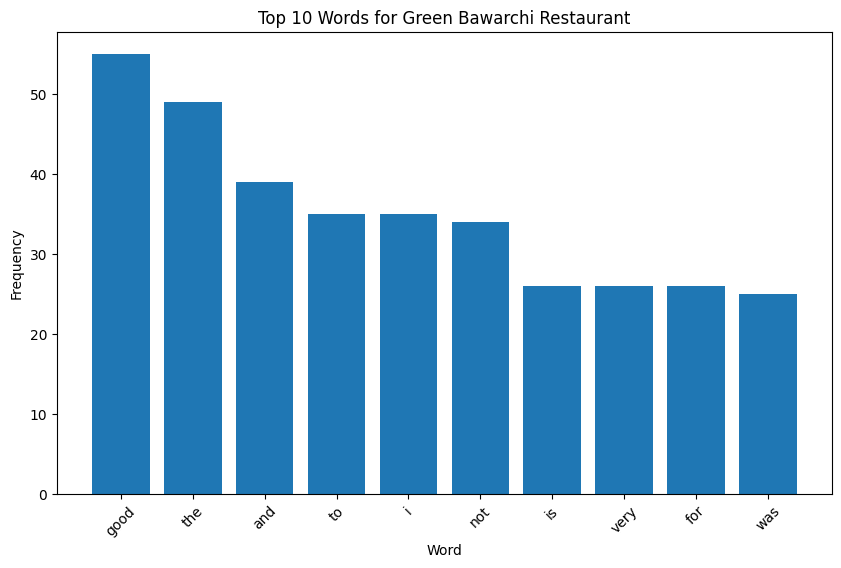

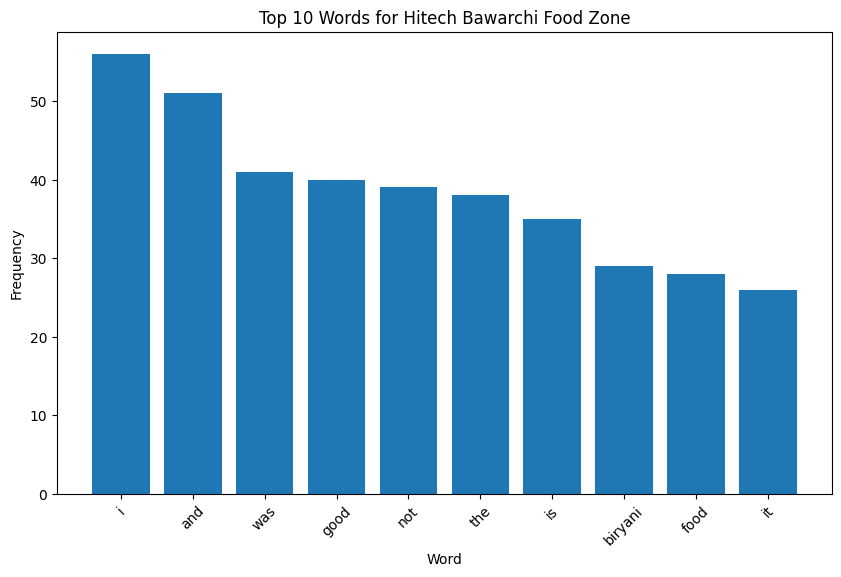

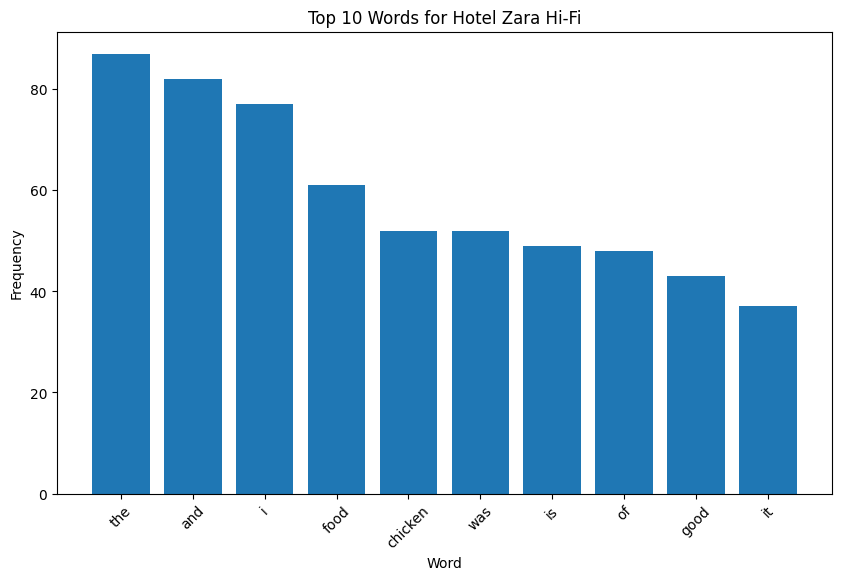

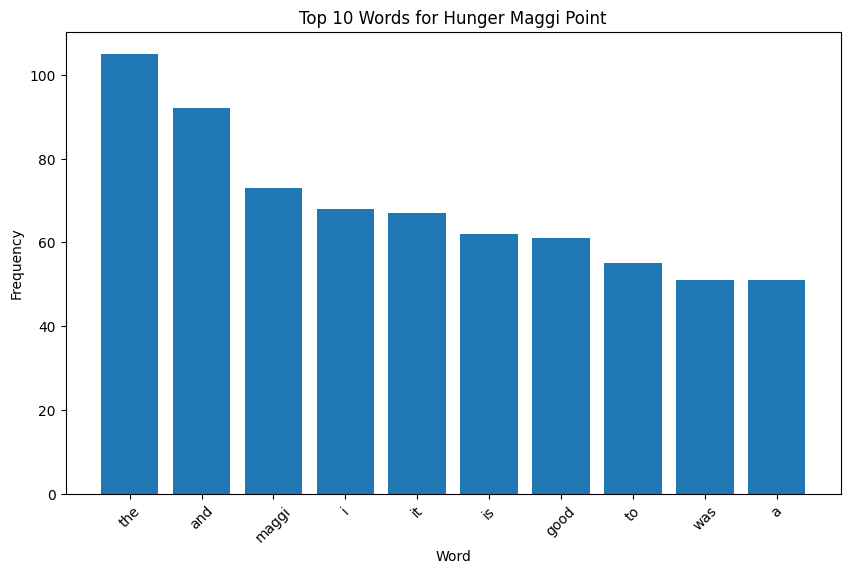

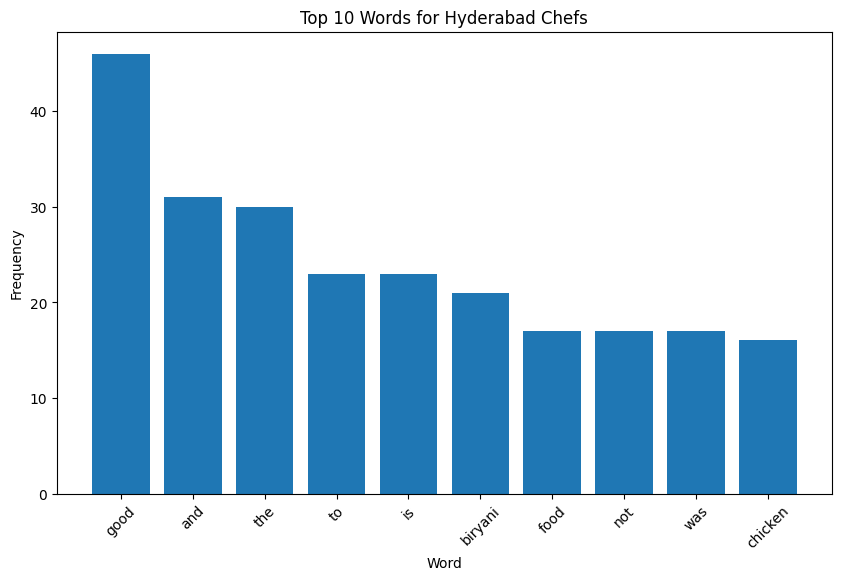

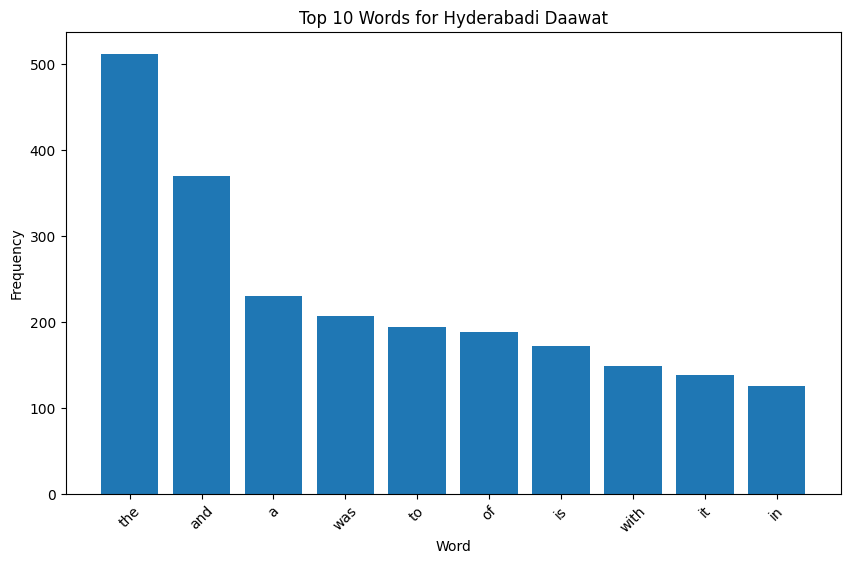

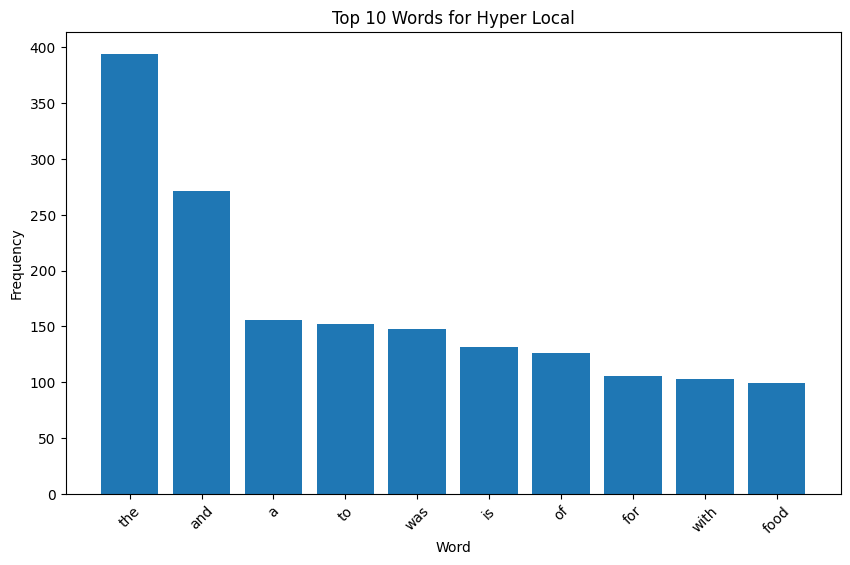

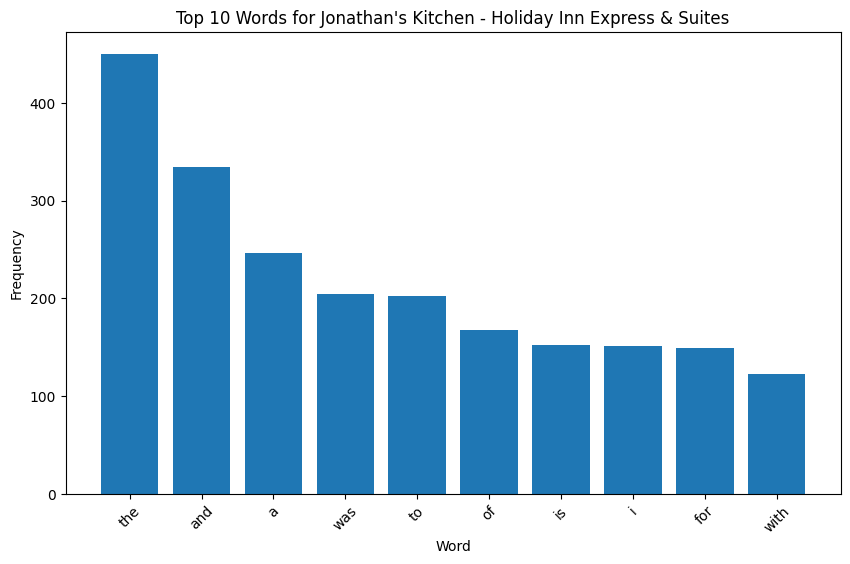

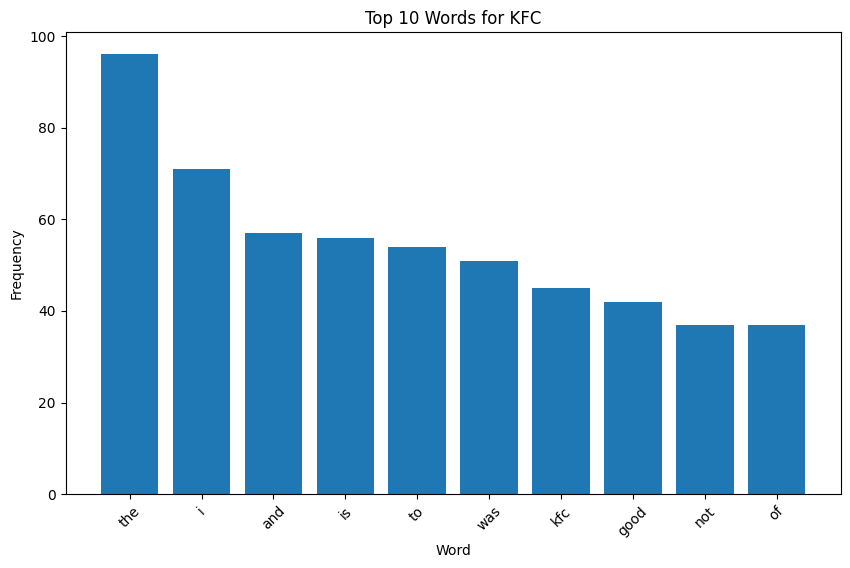

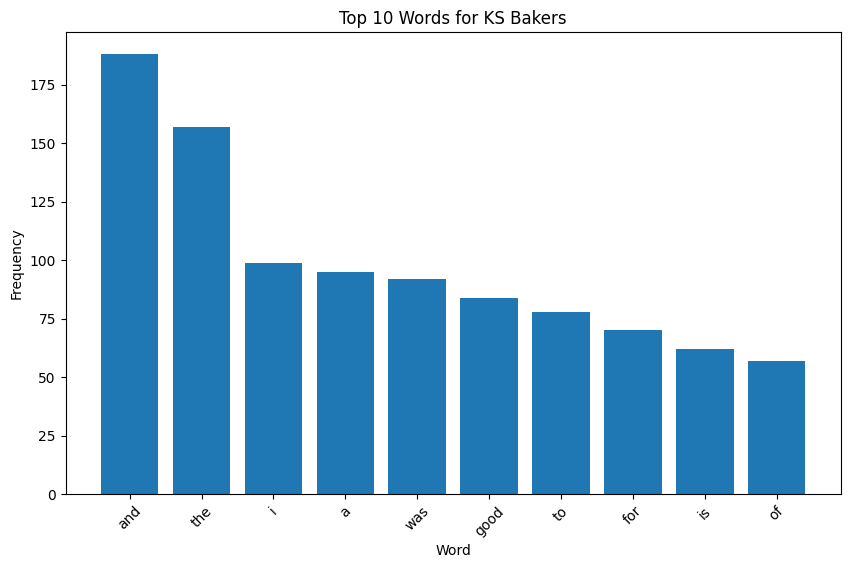

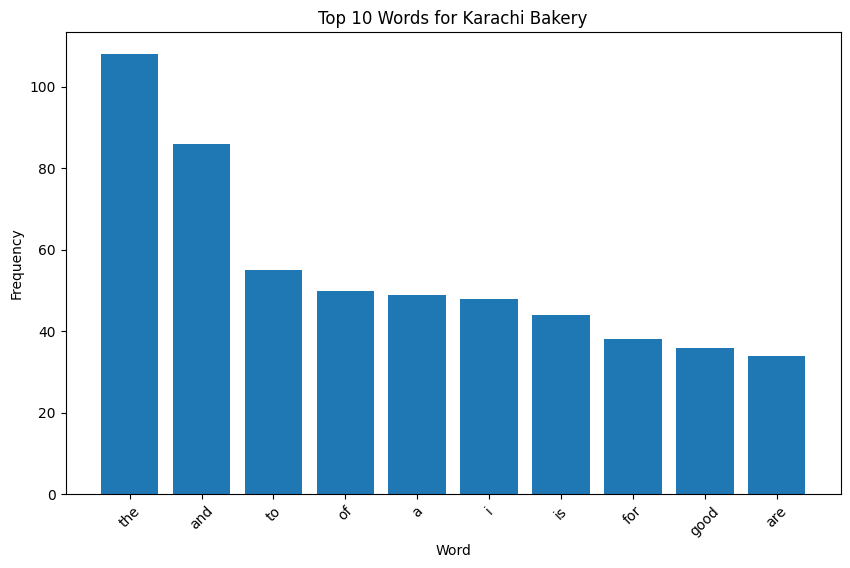

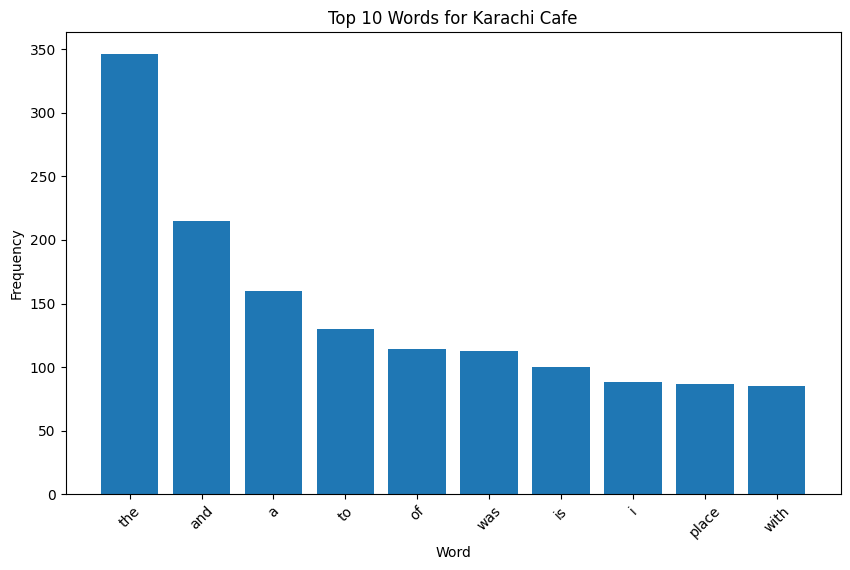

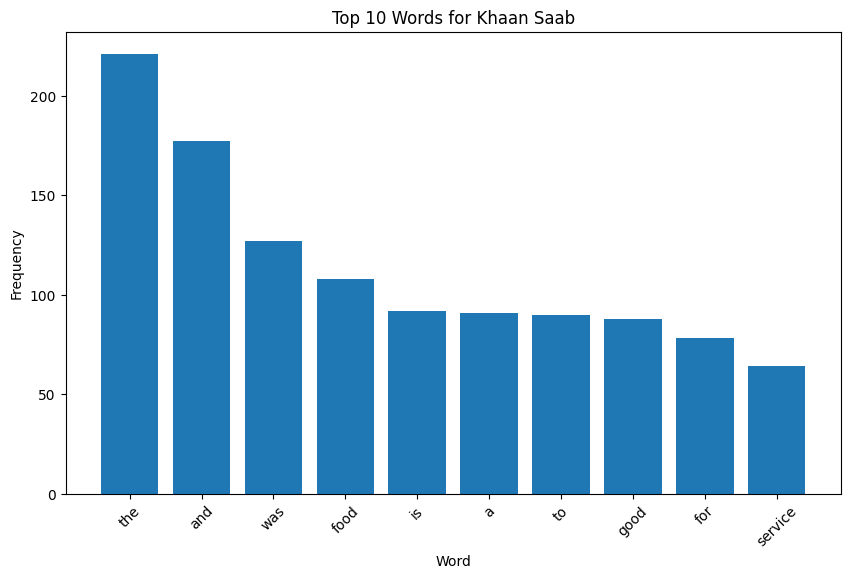

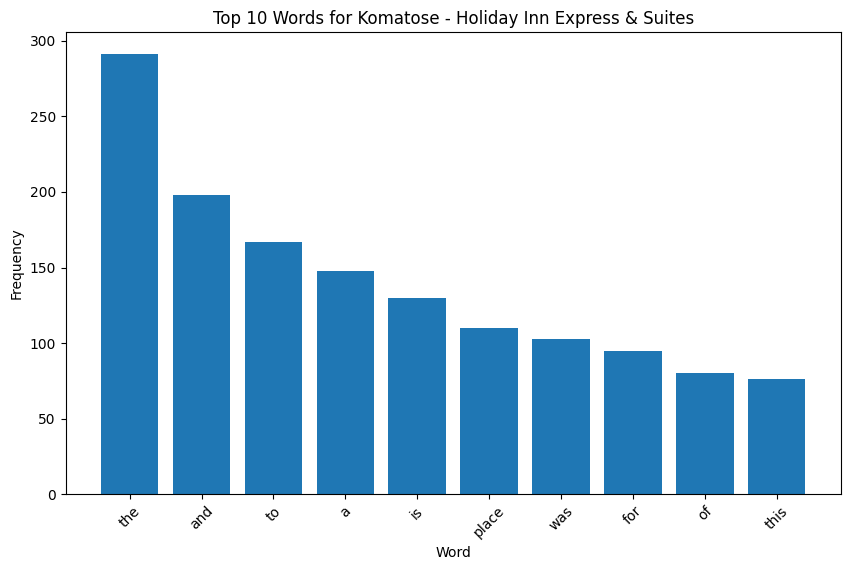

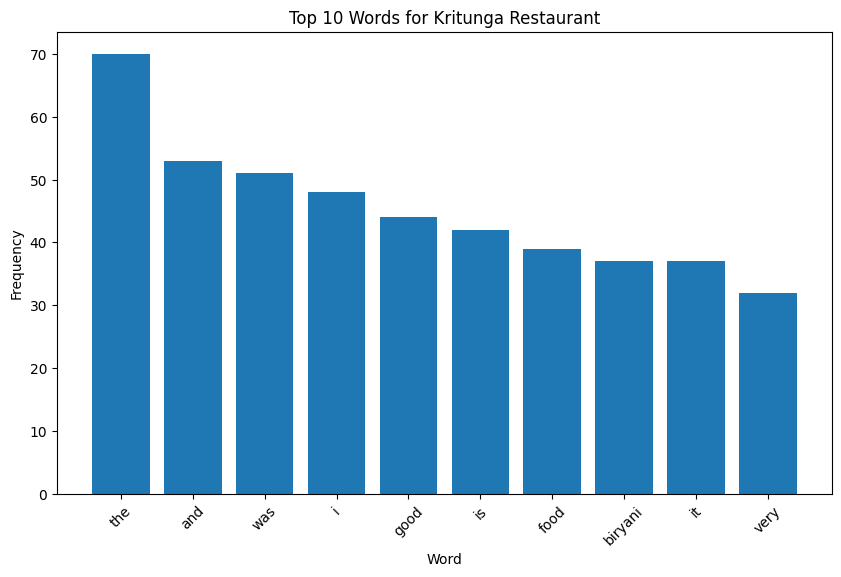

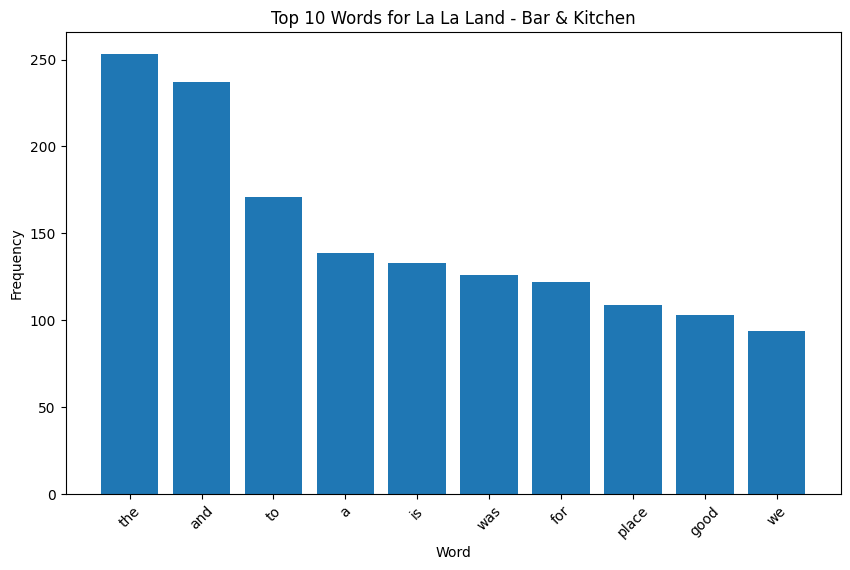

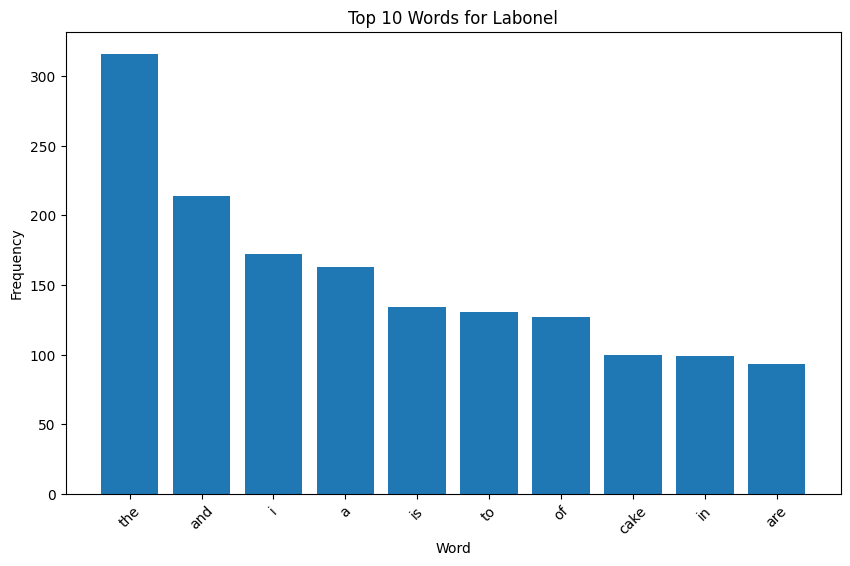

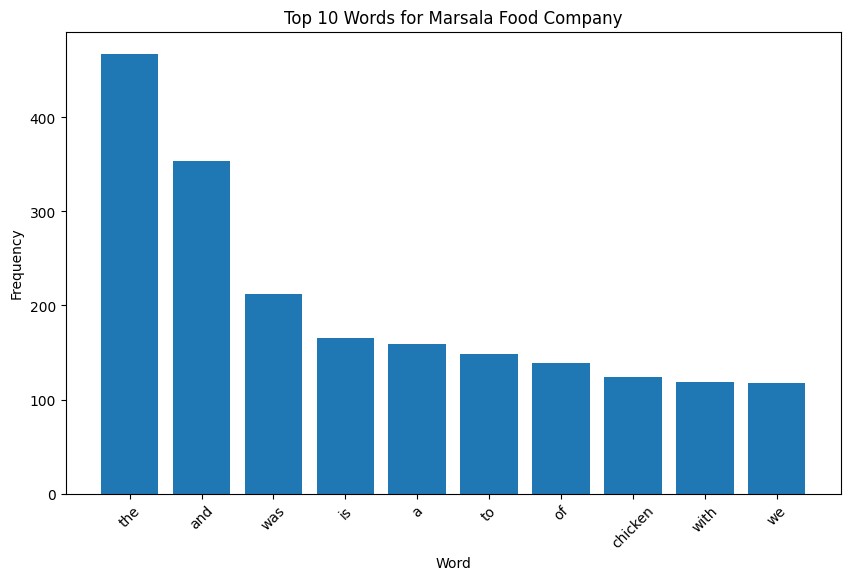

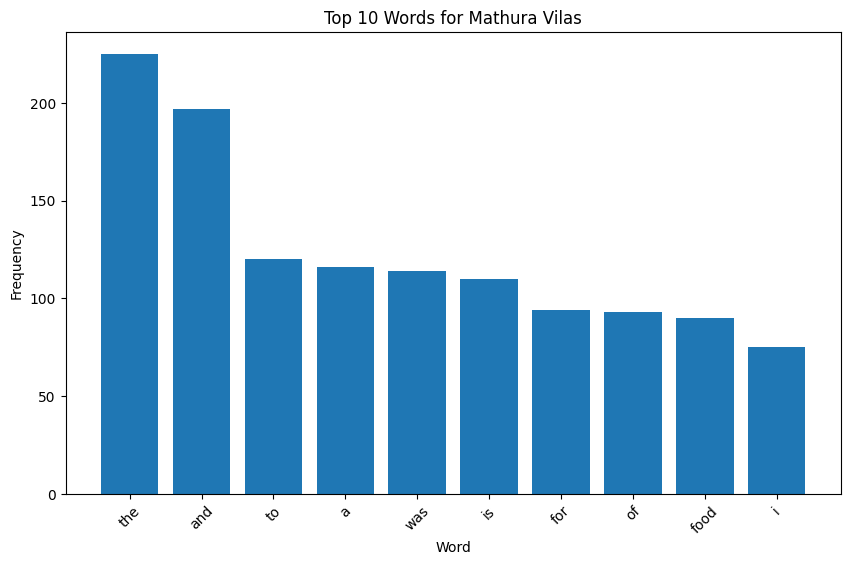

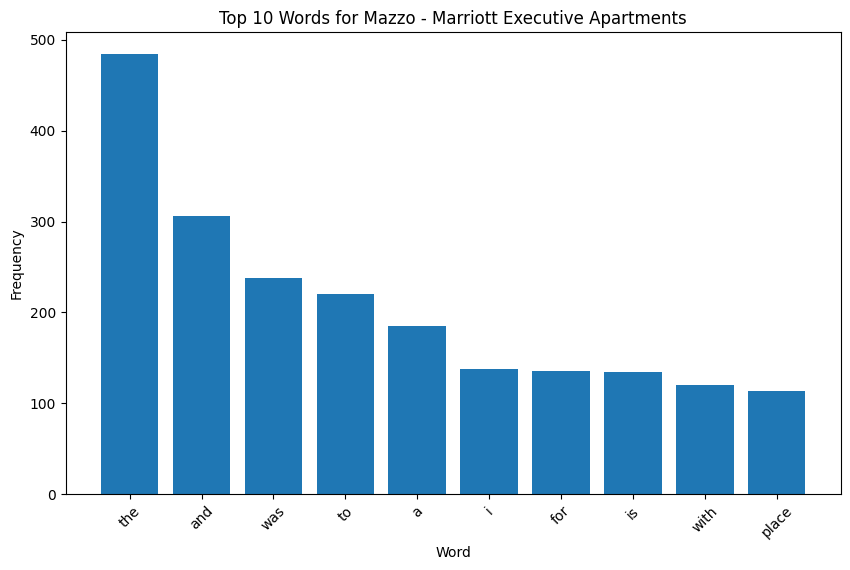

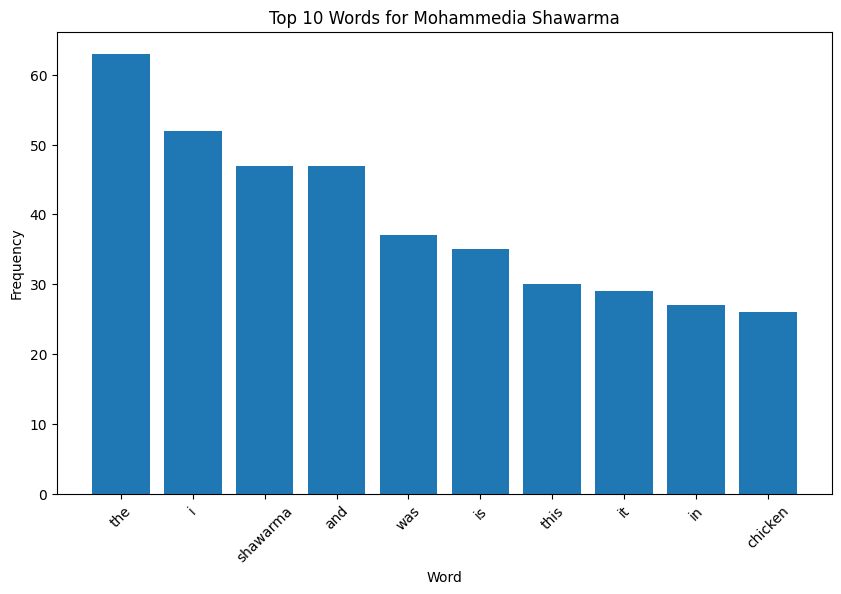

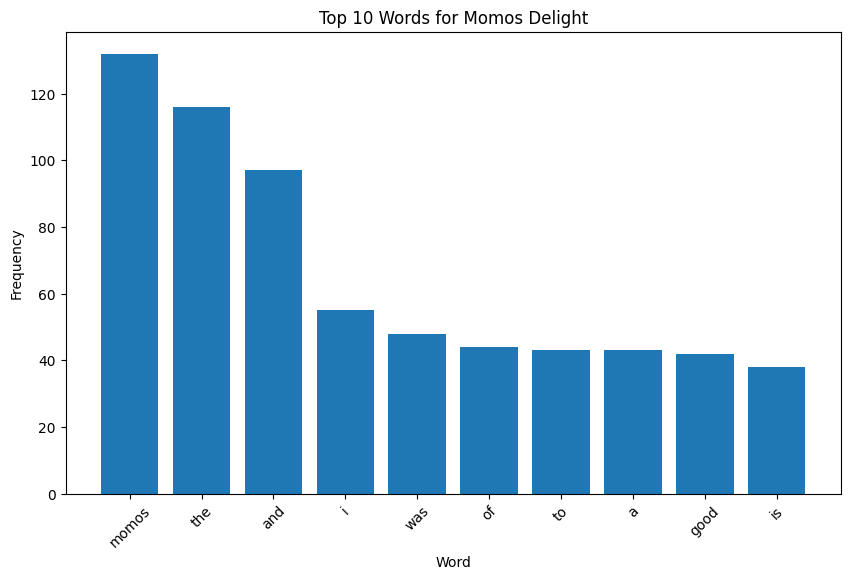

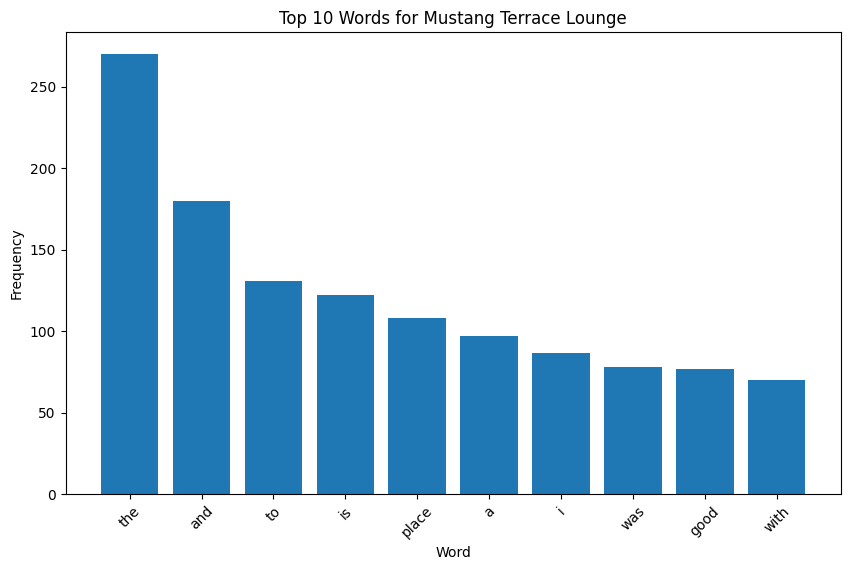

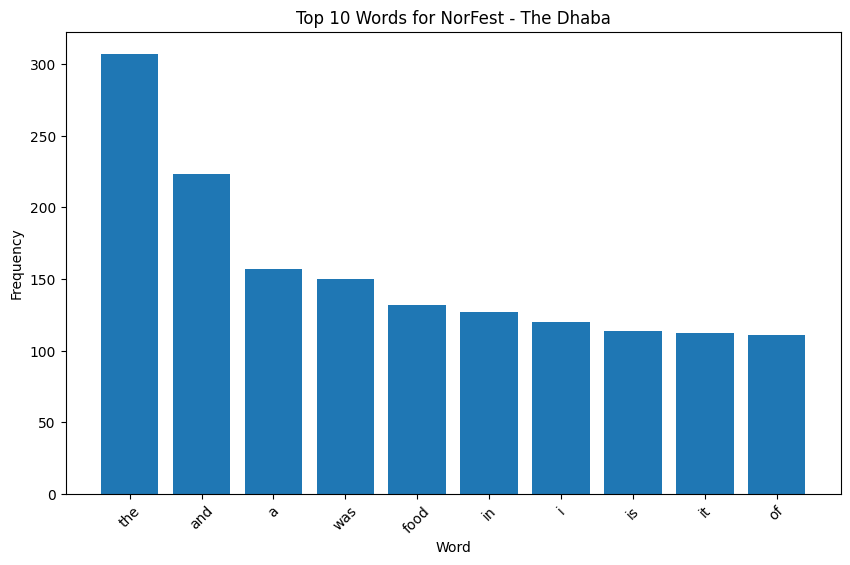

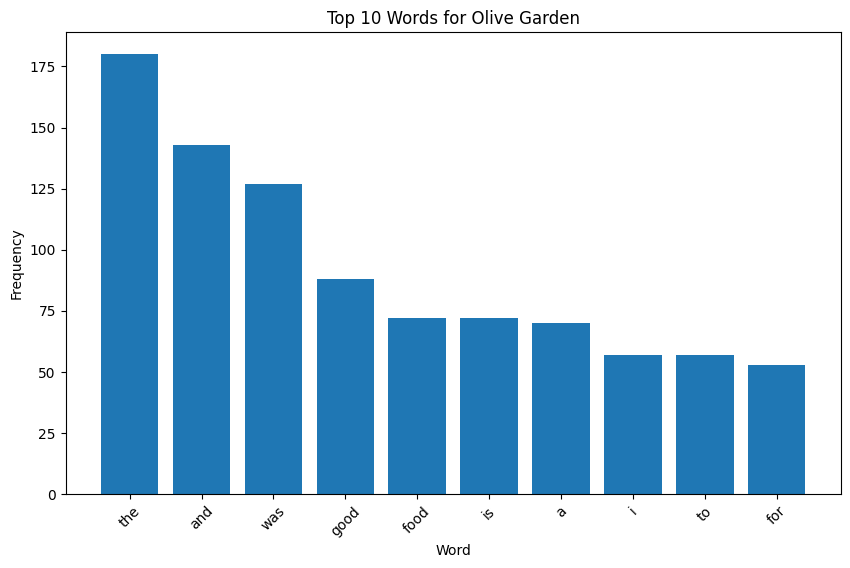

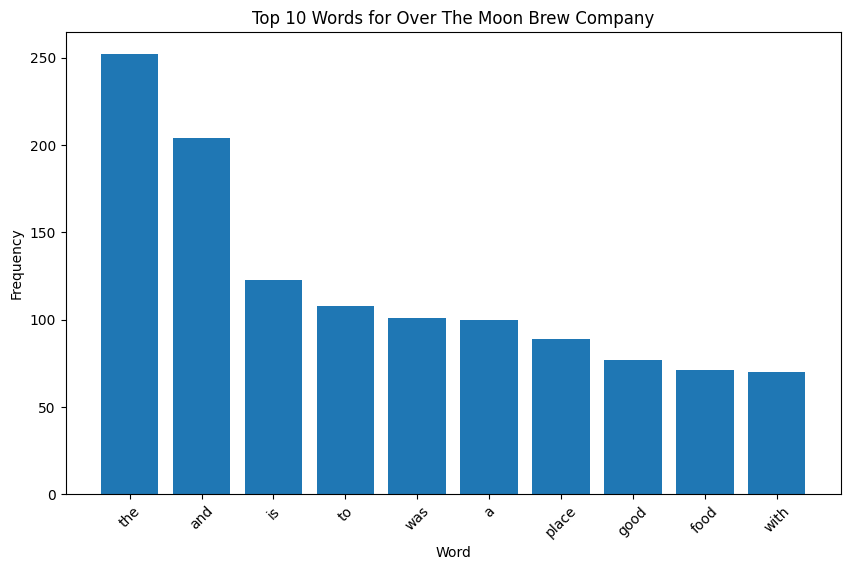

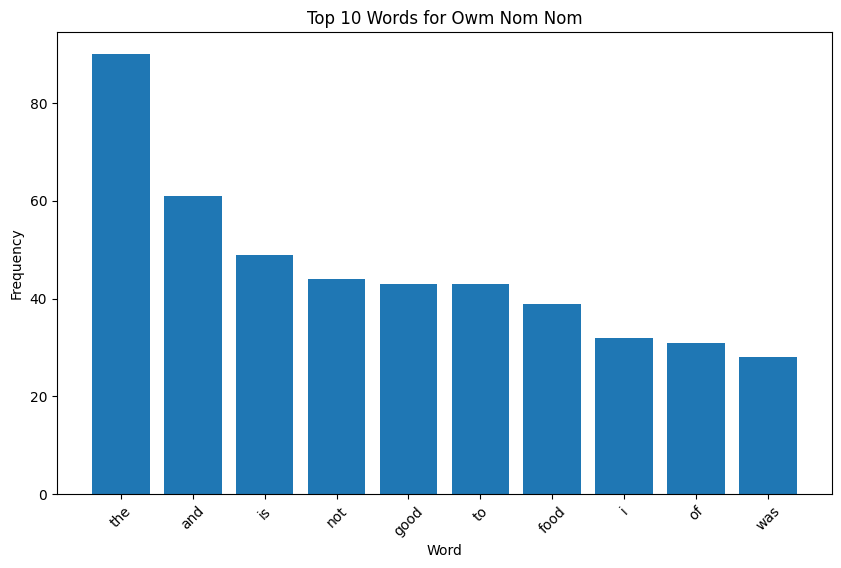

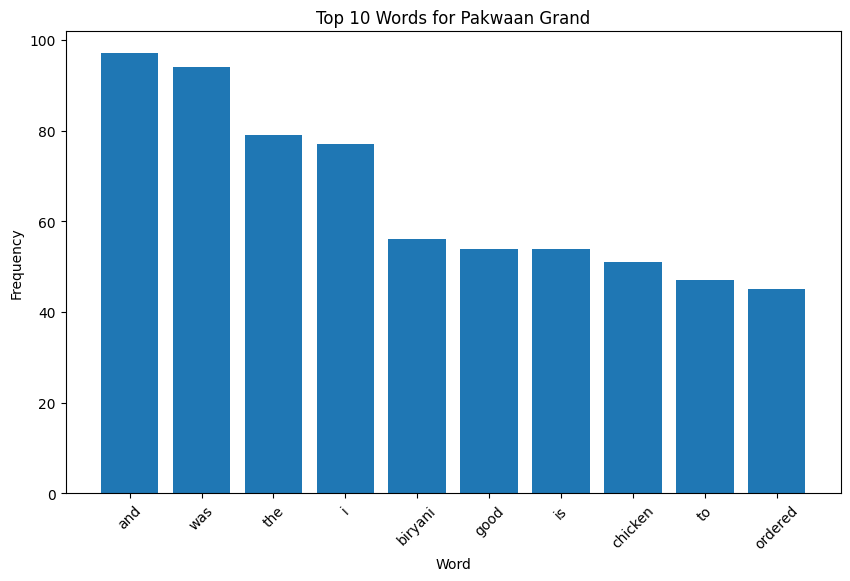

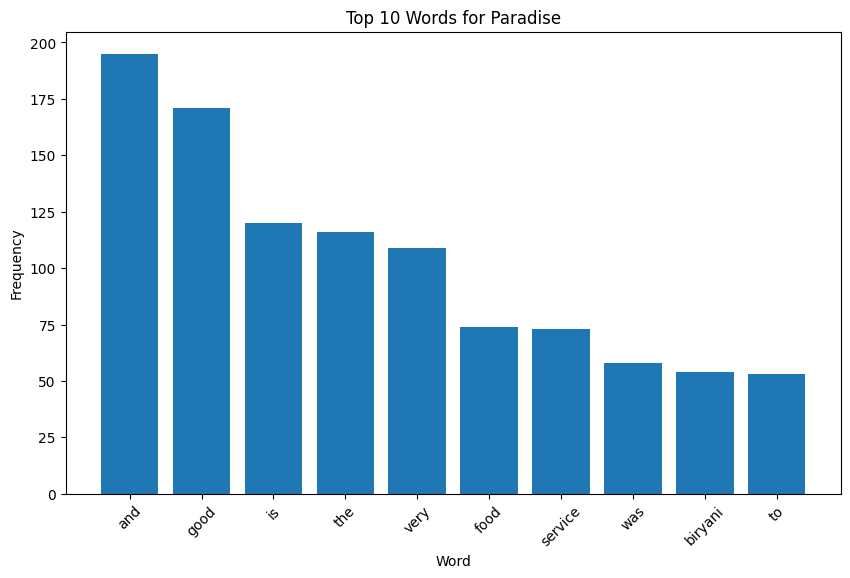

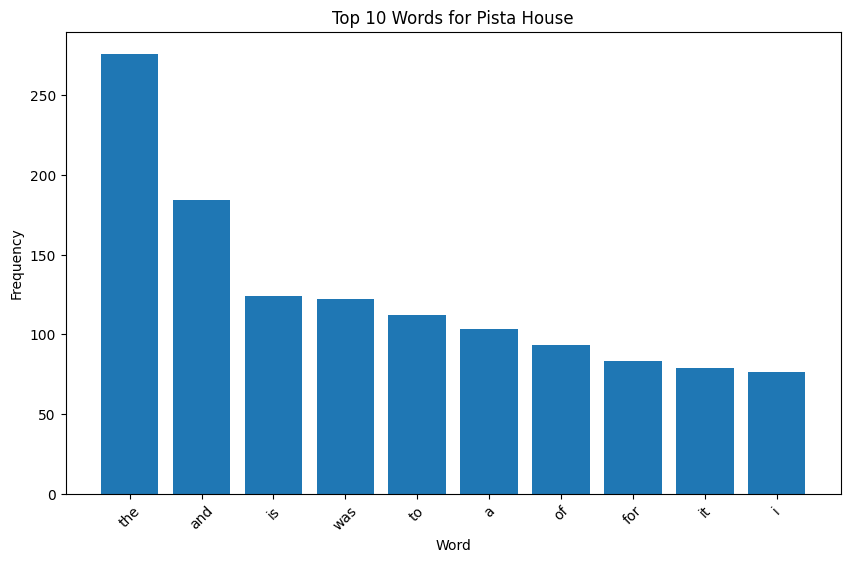

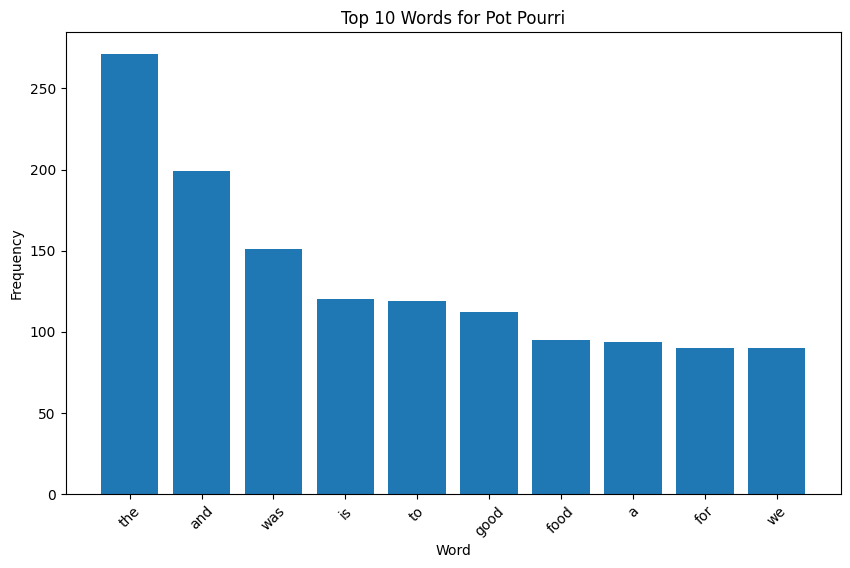

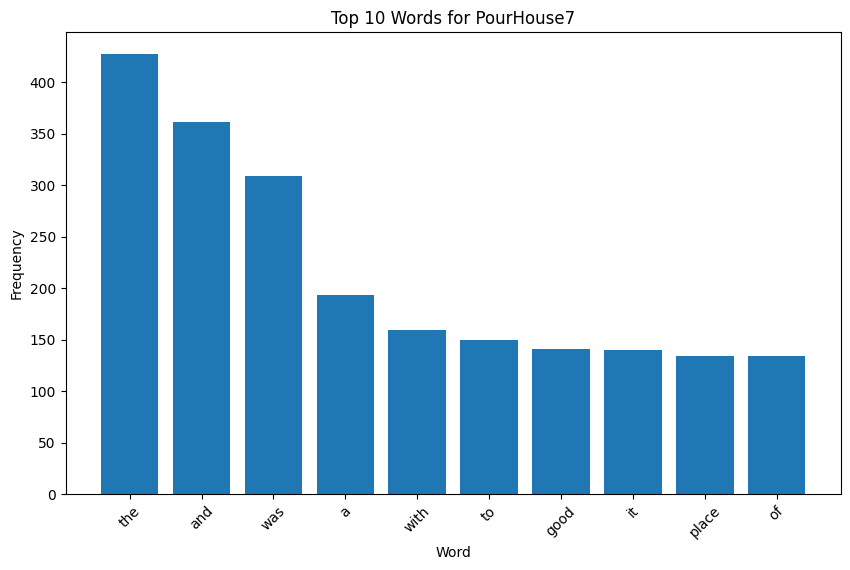

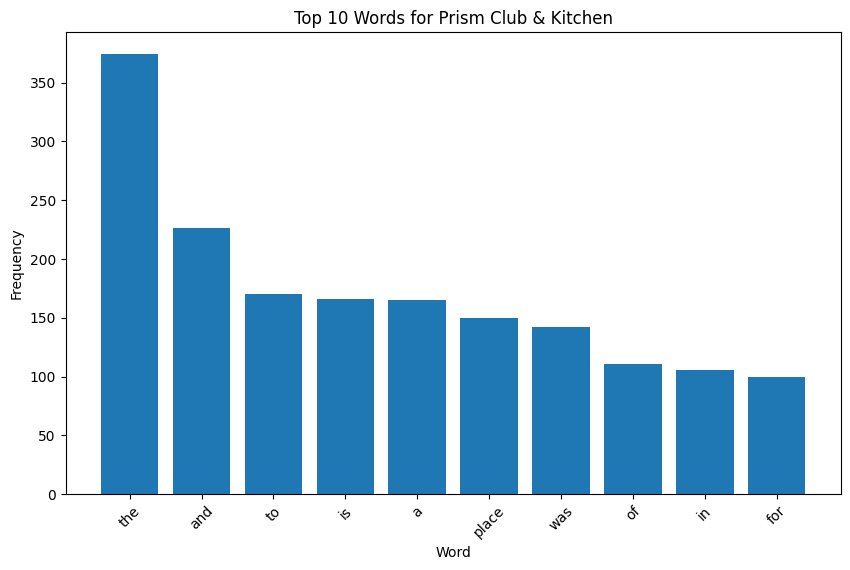

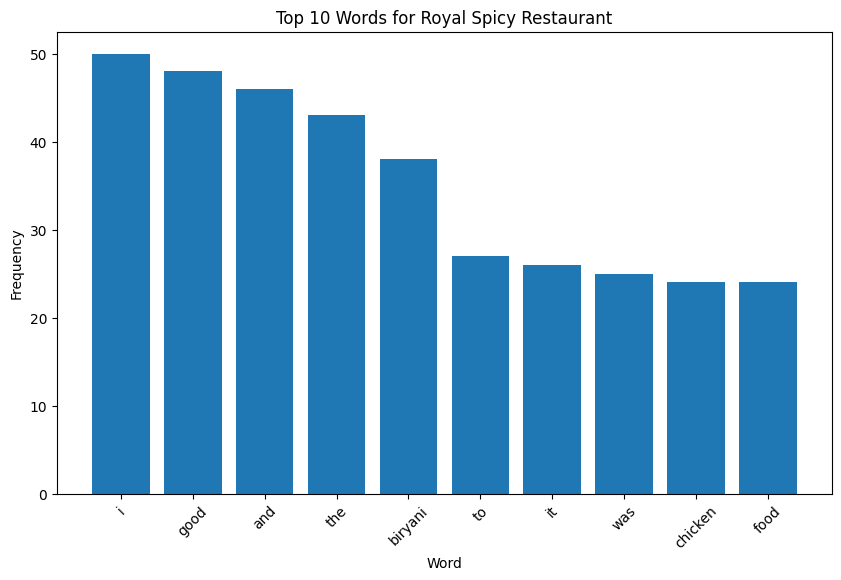

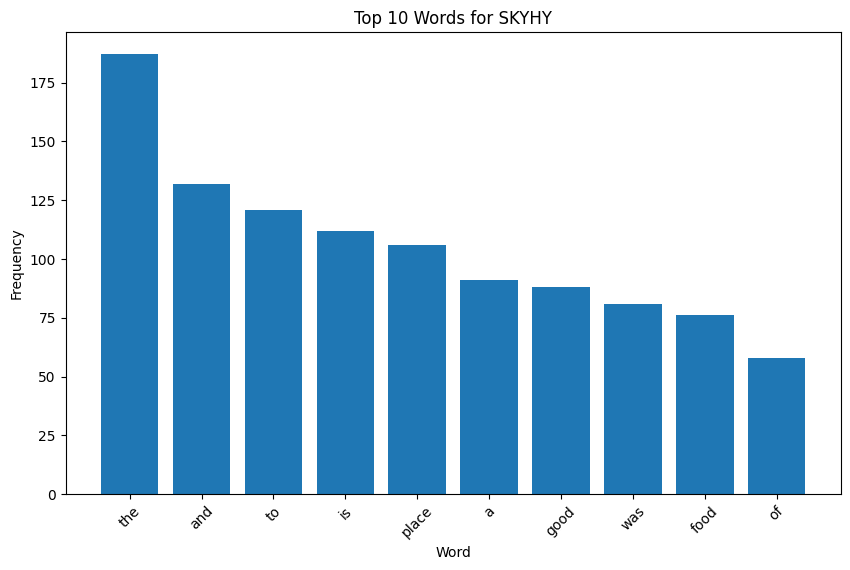

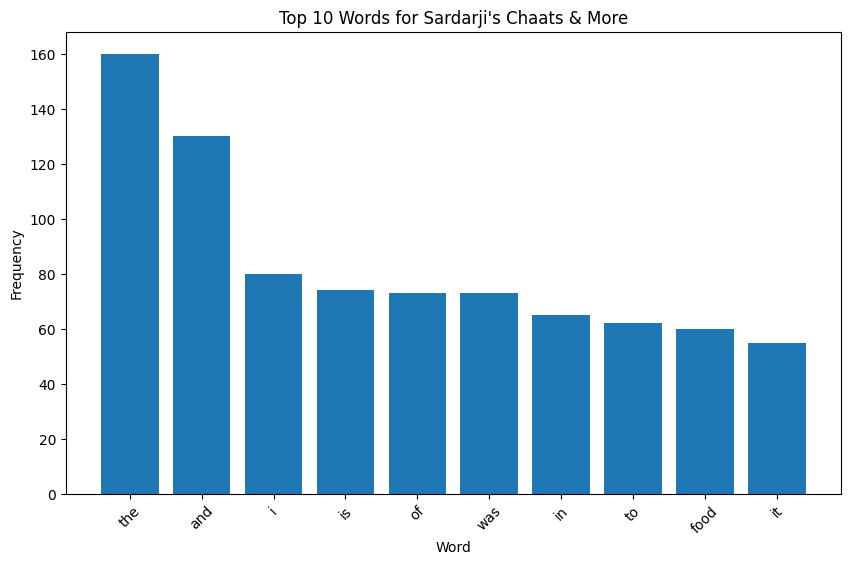

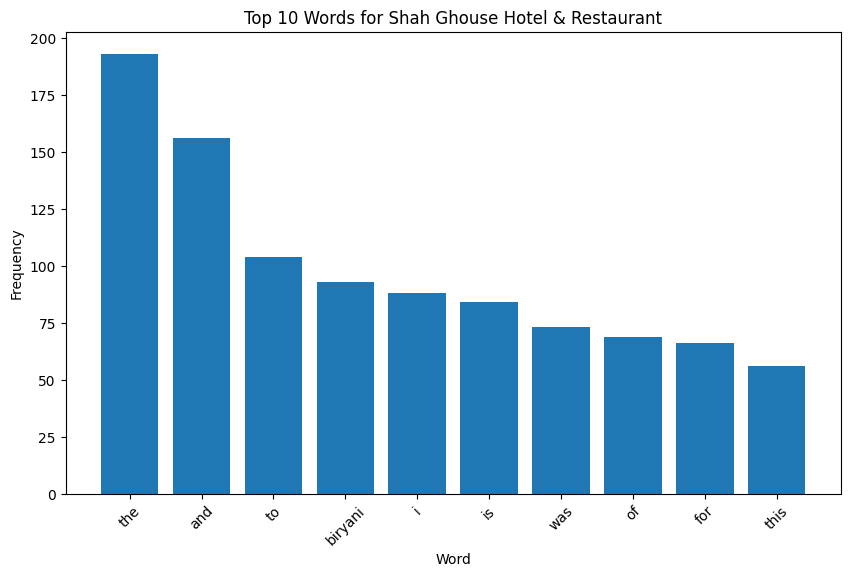

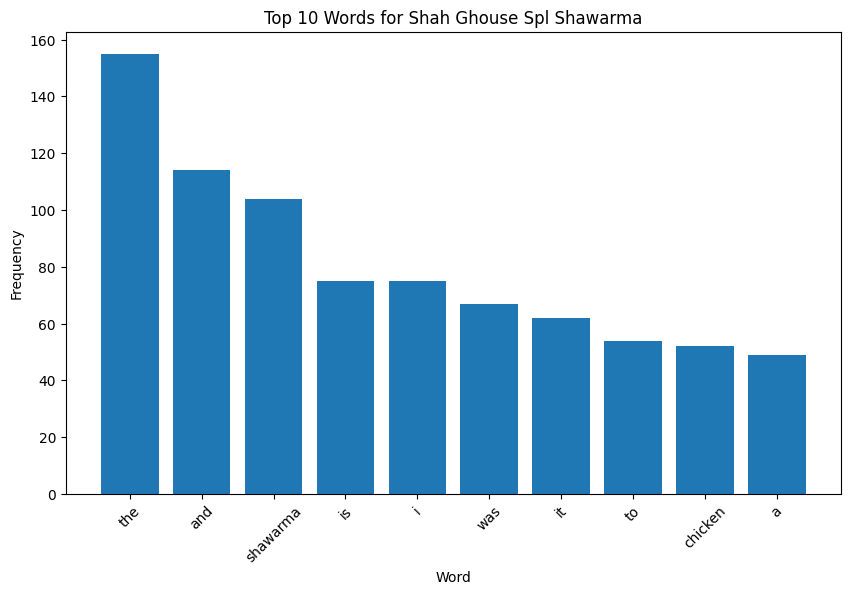

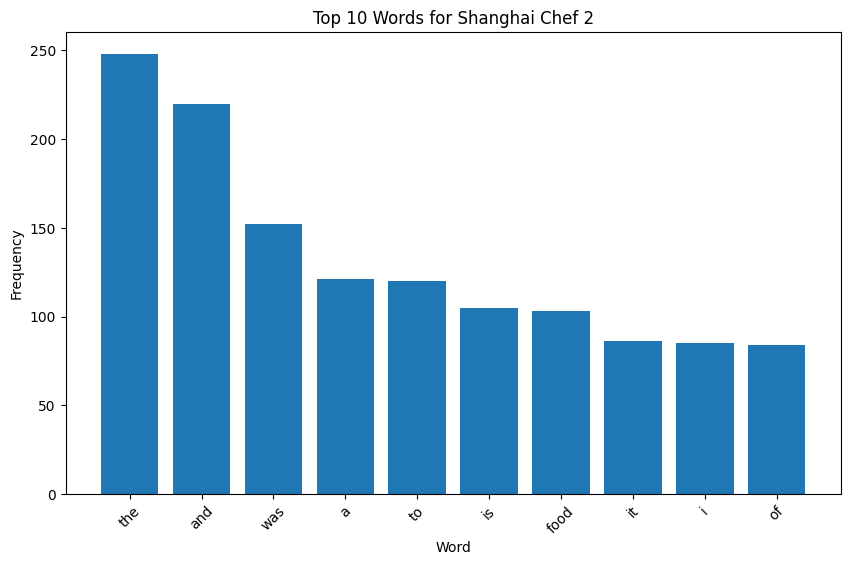

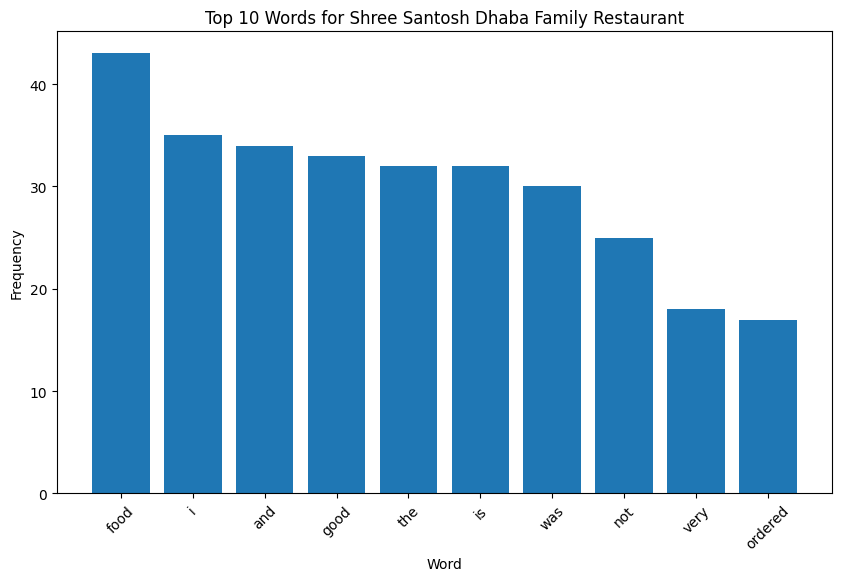

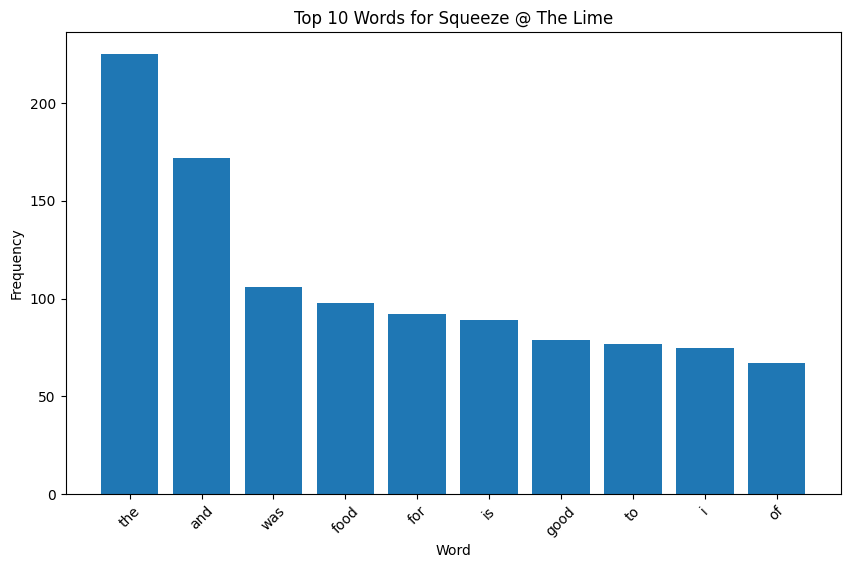

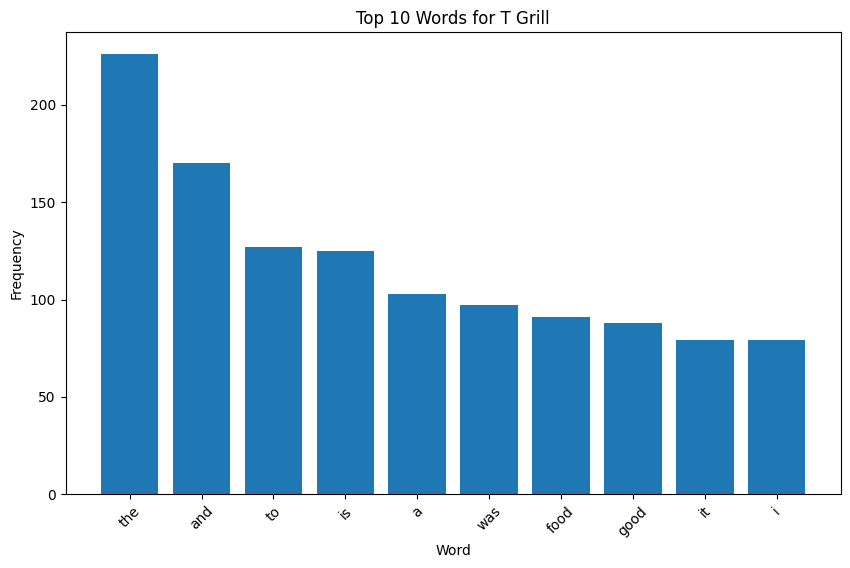

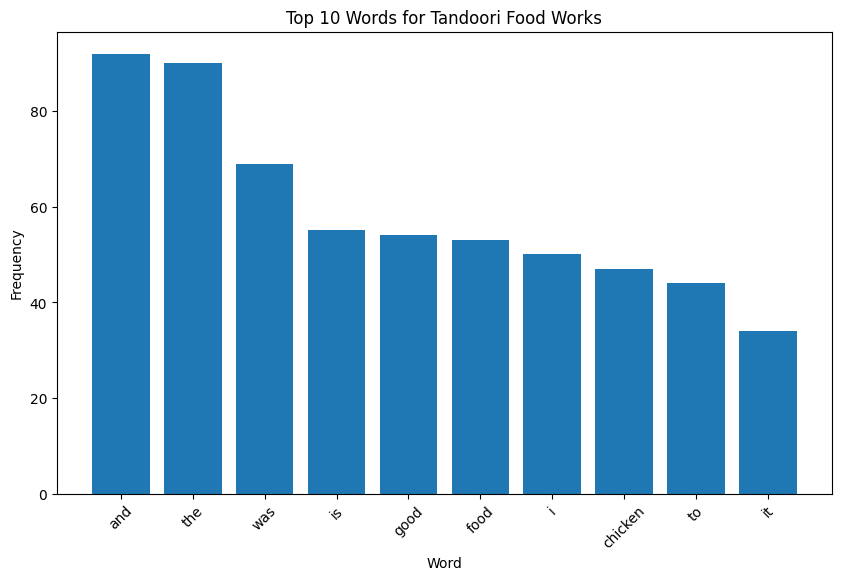

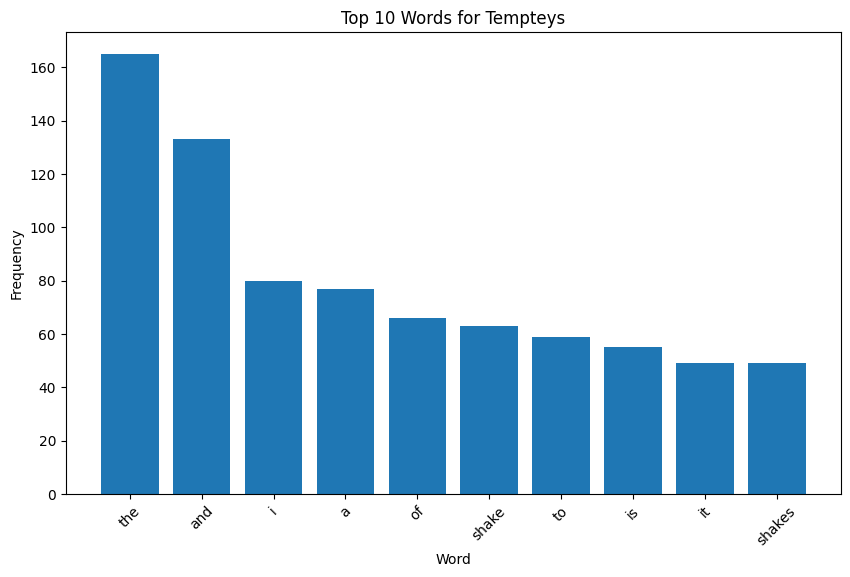

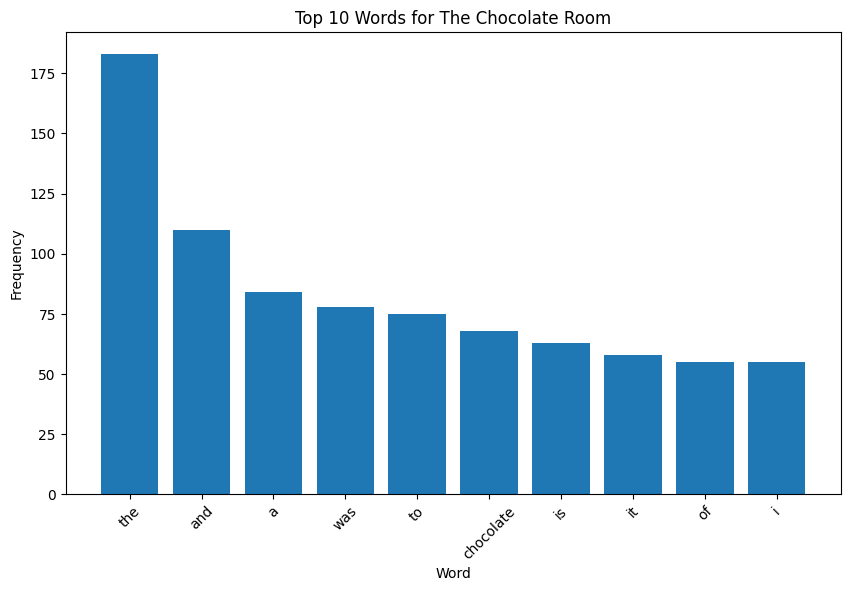

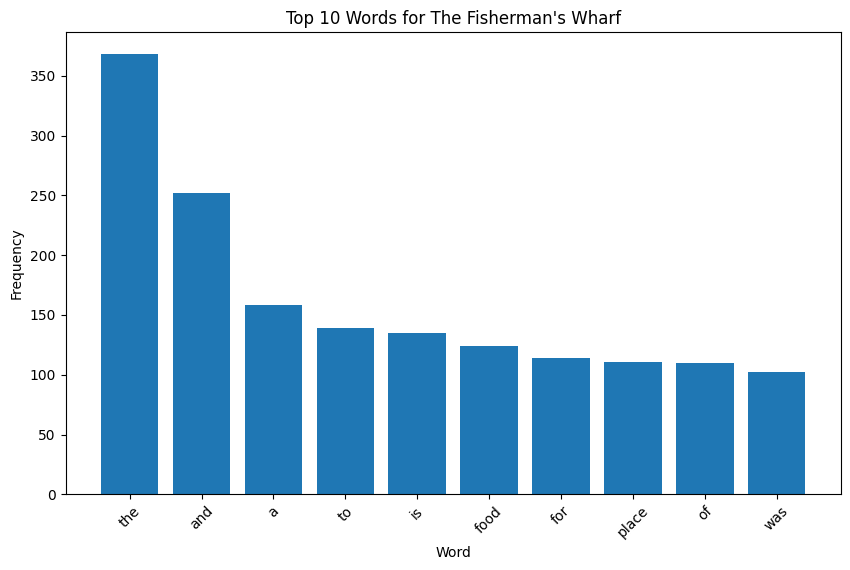

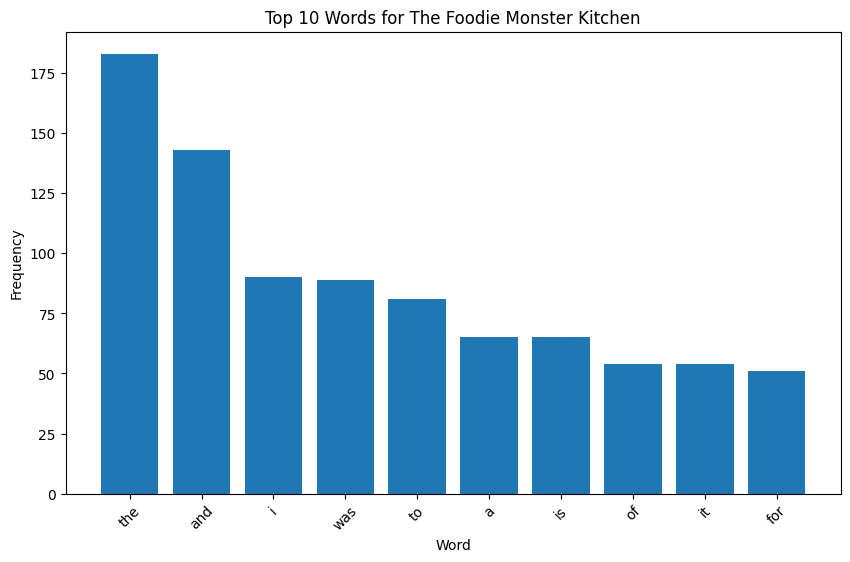

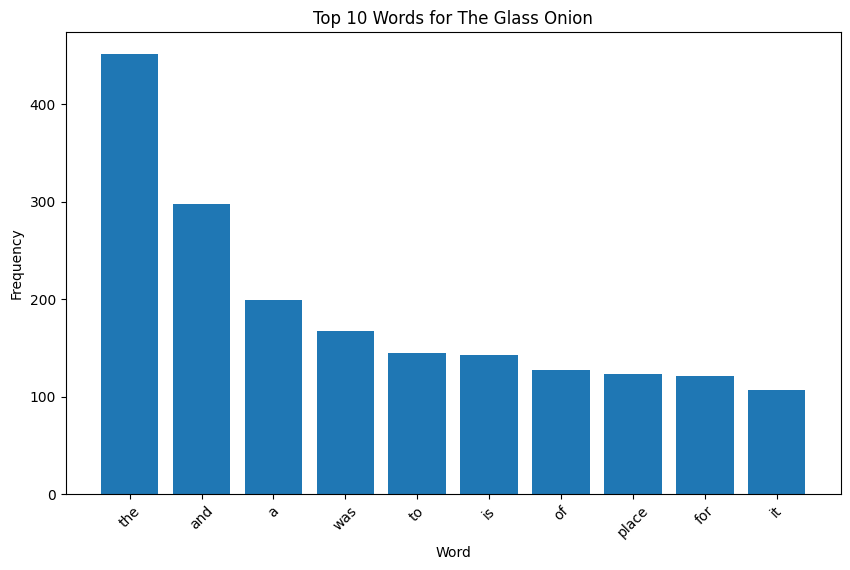

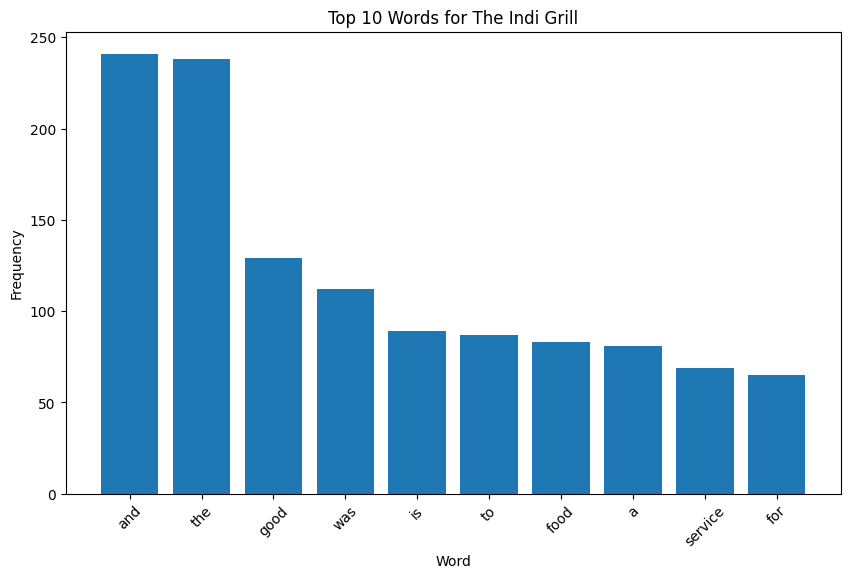

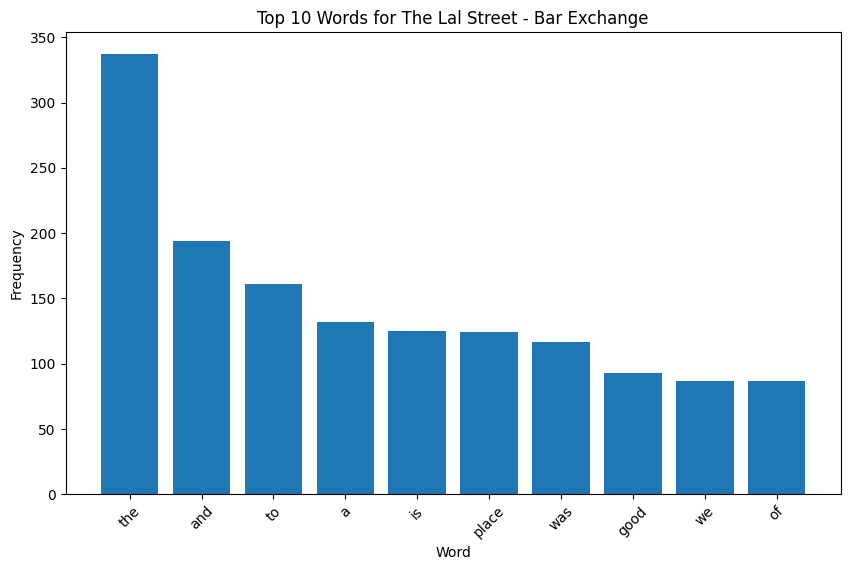

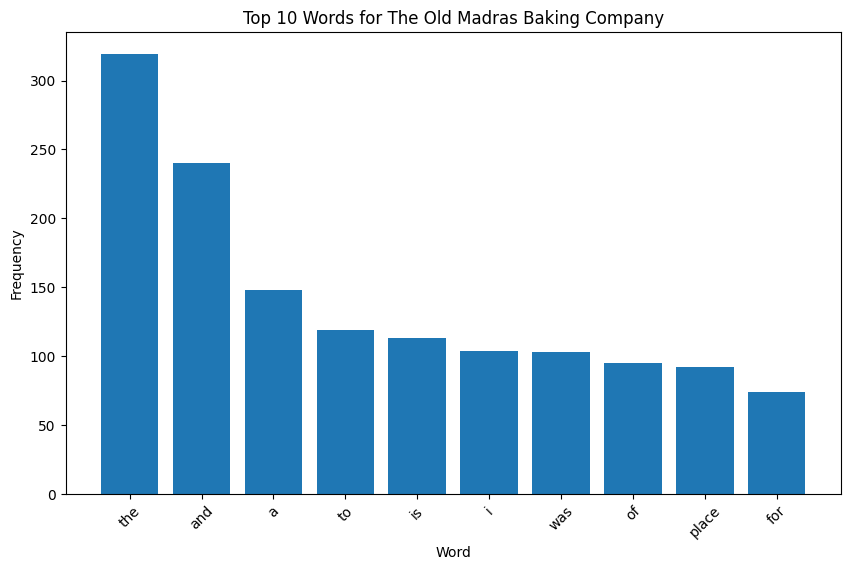

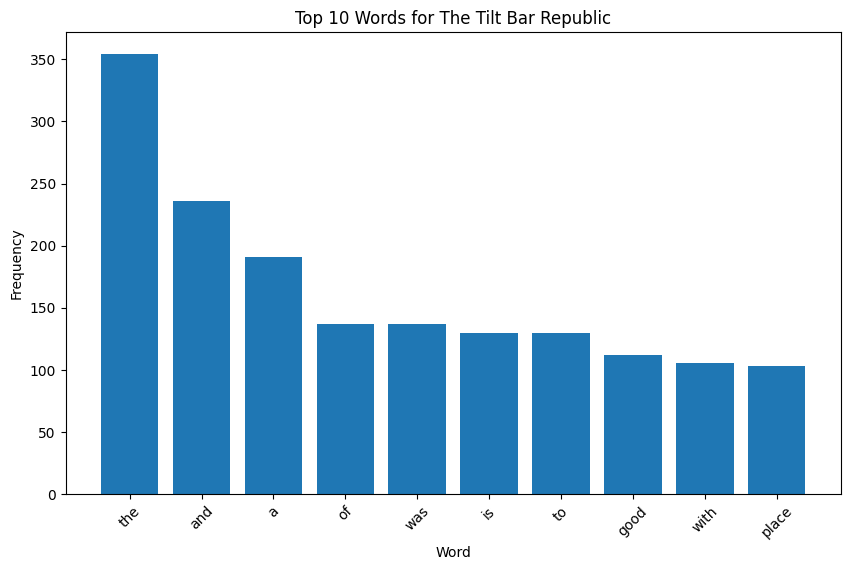

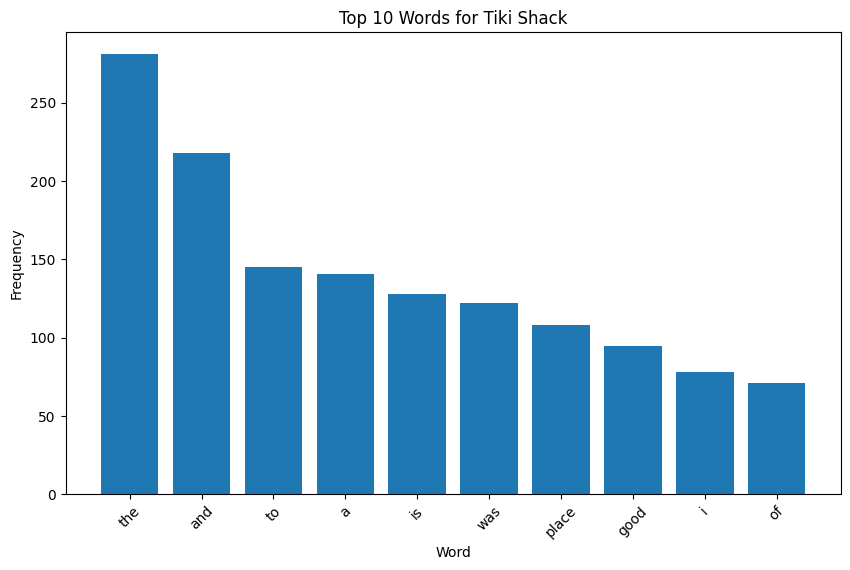

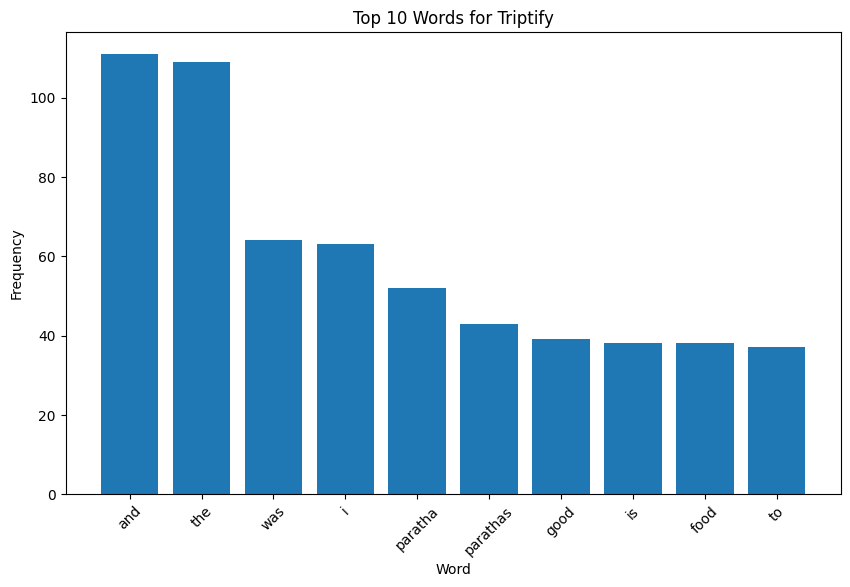

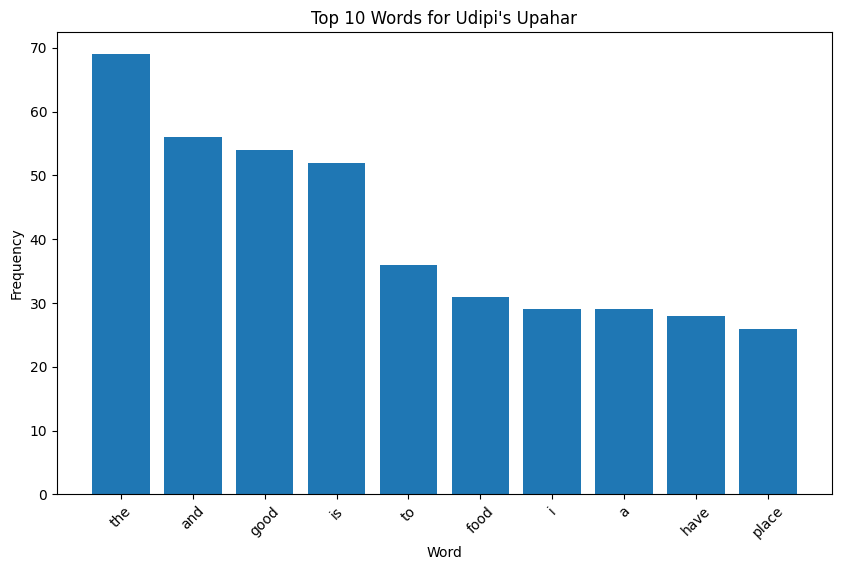

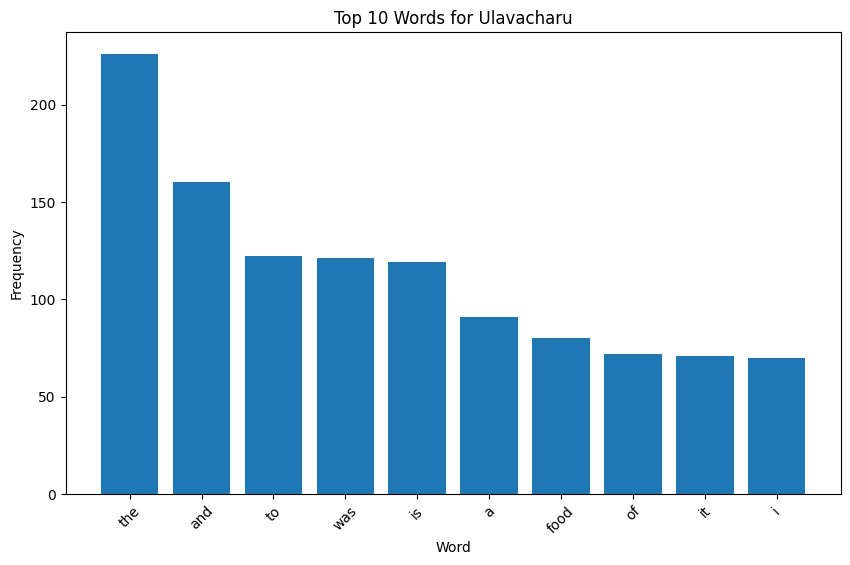

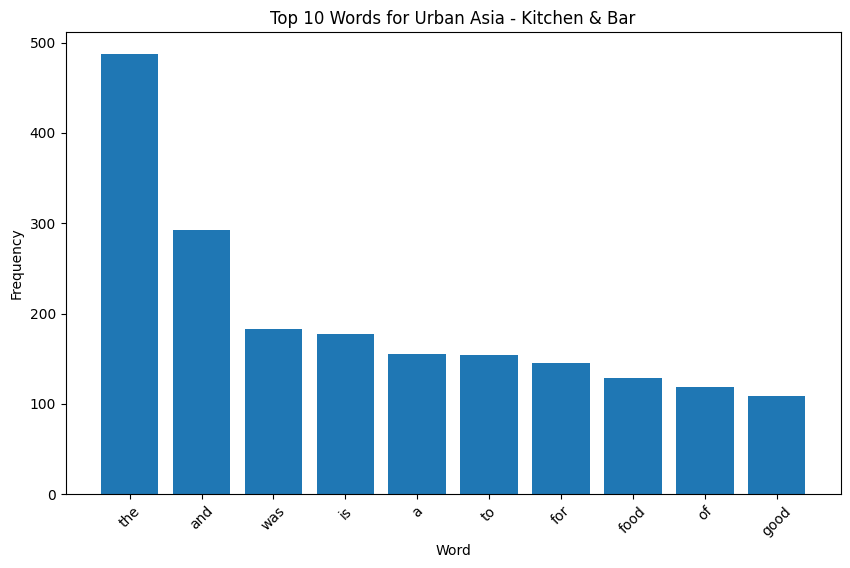

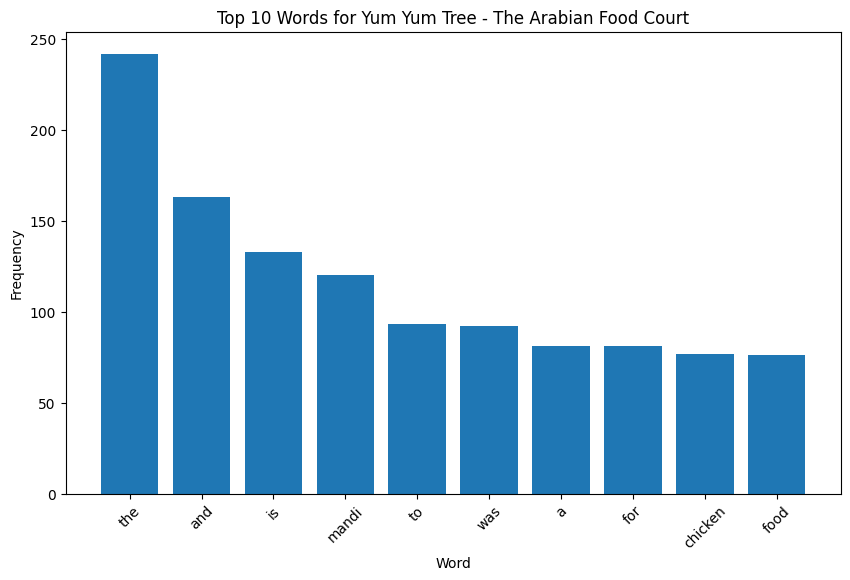

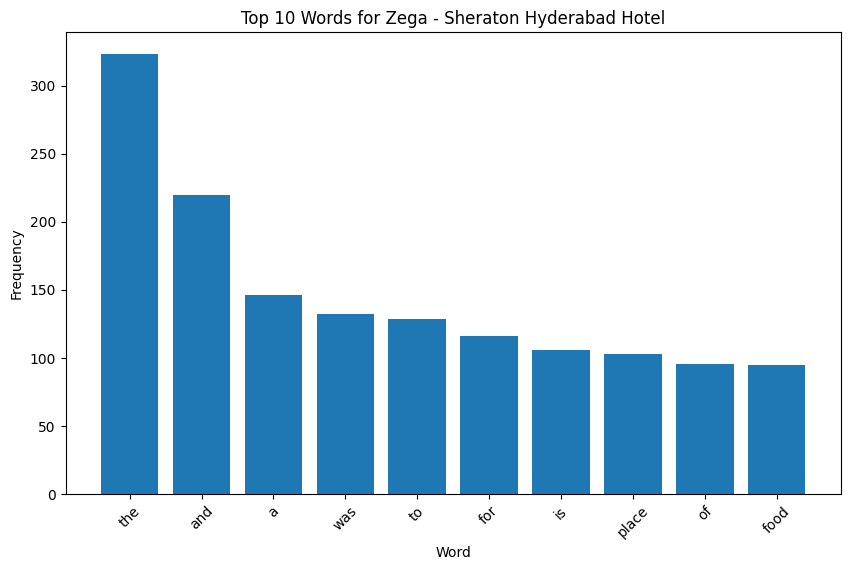

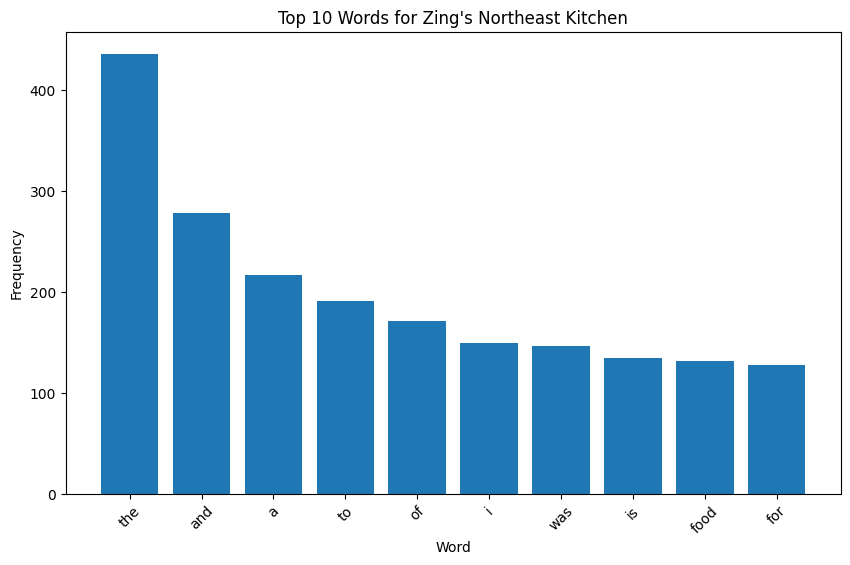

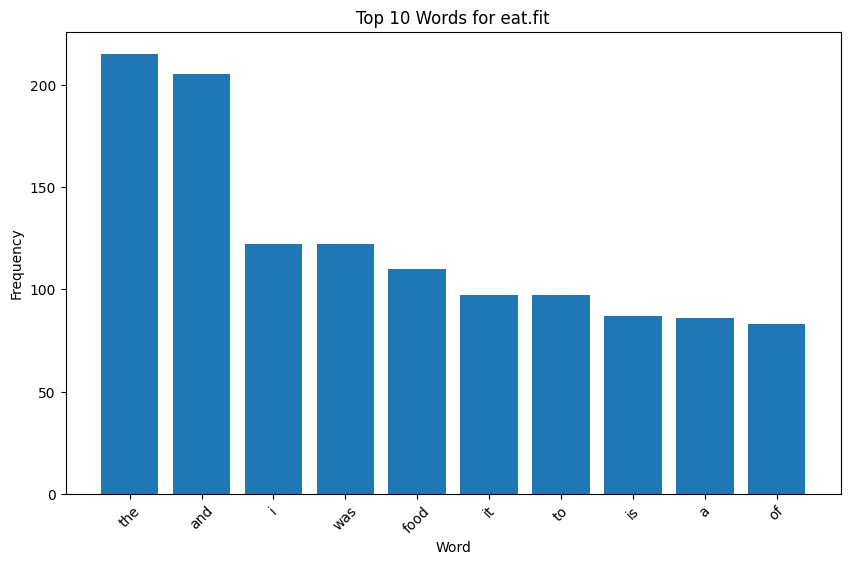

In [42]:
import string 
import nltk
def plot_top_words(df, n=10):
    for restaurant, group in df.groupby('Restaurant'):
        tokens = group['Review'].apply(word_tokenize)
        tokens = [[word for word in sublist if word.isalnum()] for sublist in tokens]  
        all_words = [word for sublist in tokens for word in sublist]
        word_freq = Counter(all_words)
        top_words = dict(word_freq.most_common(n))
        plt.figure(figsize=(10, 6))
        plt.bar(top_words.keys(), top_words.values())
        plt.title(f'Top {n} Words for {restaurant}')
        plt.xlabel('Word')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)
        plt.show()
plot_top_words(df2)


In [43]:
df.columns.values

array(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Pictures',
       'Reviews', 'Followers', 'Month', 'Year', 'Quarter'], dtype=object)

### Density Plot of Ratings

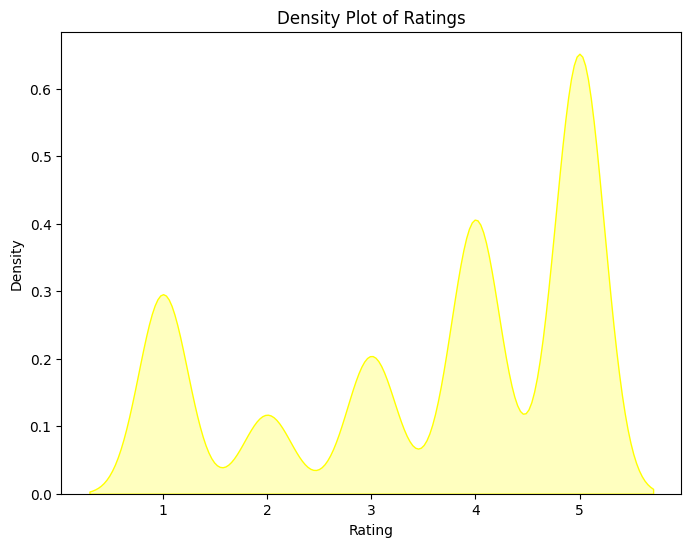

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.kdeplot(df['Rating'], fill=True, color='yellow')
plt.title('Density Plot of Ratings')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.show()


Majority of the ratings lie between 4.5 to 5

In [45]:
df2.dtypes

Restaurant     object
Reviewer       object
Review         object
Rating        float64
Pictures        int64
Reviews         int32
Followers       int32
Month           int32
Year            int32
Quarter        object
dtype: object

### Density Plot Of Followers

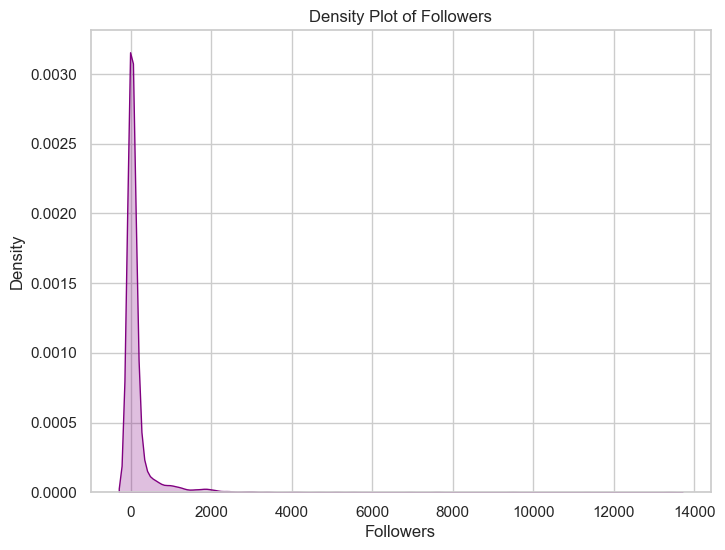

In [46]:
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.kdeplot(df2['Followers'], shade=True, color='purple')
plt.title('Density Plot of Followers')
plt.xlabel('Followers')
plt.ylabel('Density')
plt.grid(True)
plt.show()


### Distribution Of Reviews

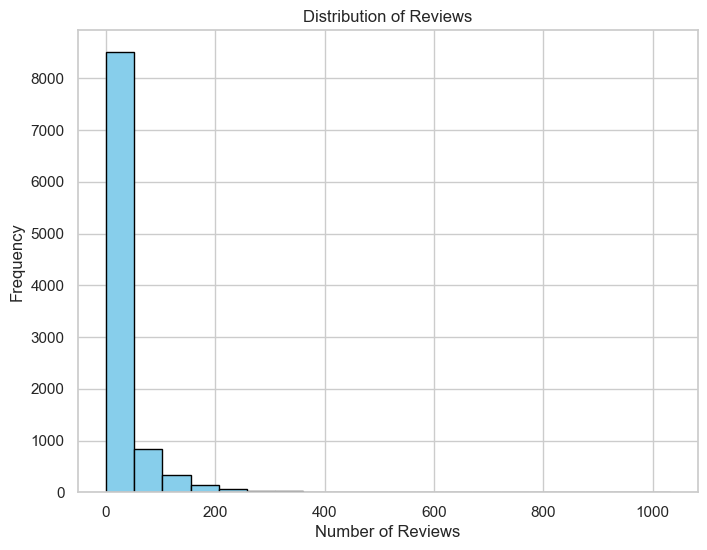

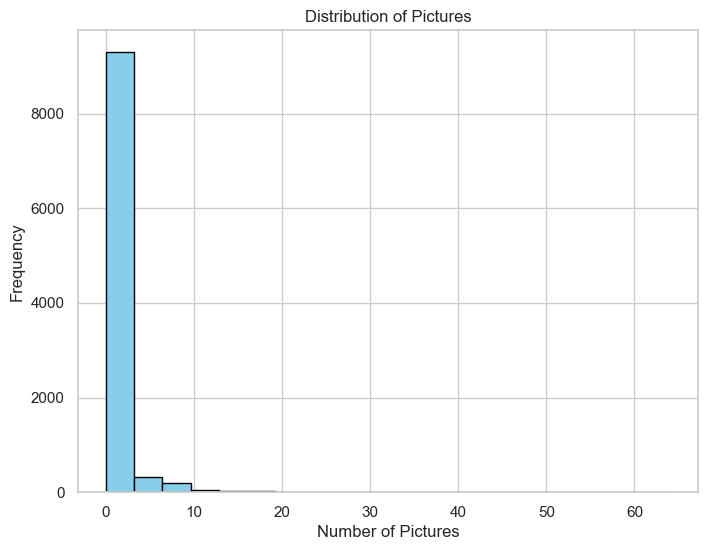

In [48]:
plt.figure(figsize=(8, 6))
plt.hist(df2['Reviews'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(df2['Pictures'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Pictures')
plt.xlabel('Number of Pictures')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Relationship between Rating and Followers

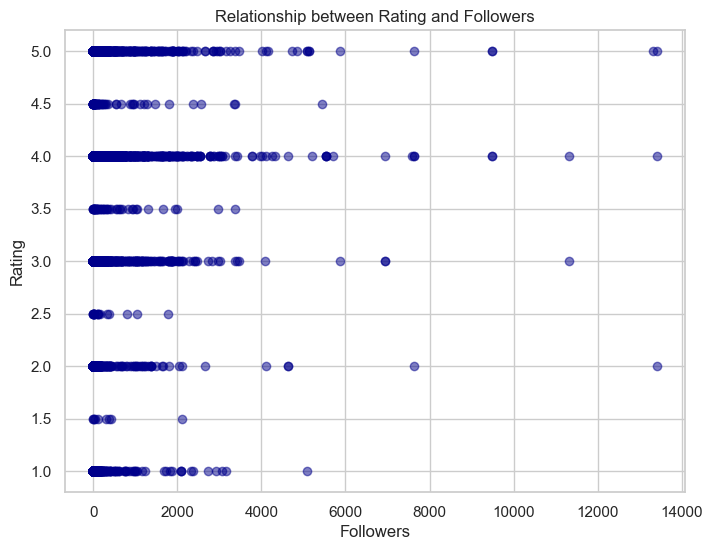

In [49]:
plt.figure(figsize=(8, 6))
plt.scatter(df2['Followers'], df2['Rating'], color='darkblue', alpha=0.5)
plt.title('Relationship between Rating and Followers')
plt.xlabel('Followers')
plt.ylabel('Rating')
plt.grid(True)
plt.show()


With higher ratings tend to also have more followers. There are a few accounts with high ratings but a relatively low number of followers, which could be outliers or new accounts that haven't had a chance to build a following yet.

### Top 5 Restaurants with the Best Ratings

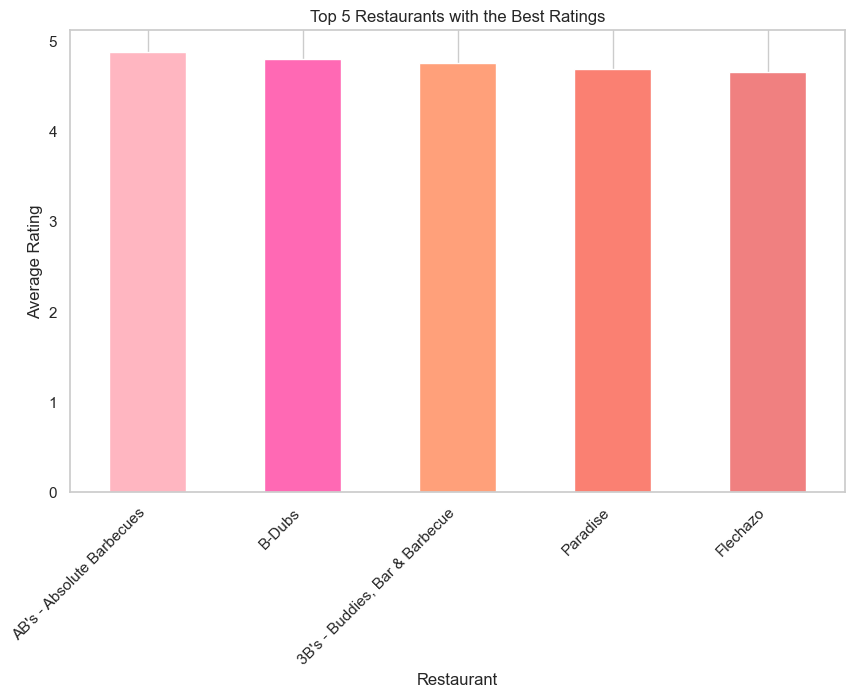

In [50]:
restaurant_ratings = df2.groupby('Restaurant')['Rating'].mean().sort_values(ascending=False)
top_5_restaurants = restaurant_ratings.head(5)
colors = ['#FFB6C1', '#FF69B4', '#FFA07A', '#FA8072', '#F08080']

plt.figure(figsize=(10, 6))
top_5_restaurants.plot(kind='bar', color=colors)
plt.title('Top 5 Restaurants with the Best Ratings')
plt.xlabel('Restaurant')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


### Correlation Matrix (HeatMap)

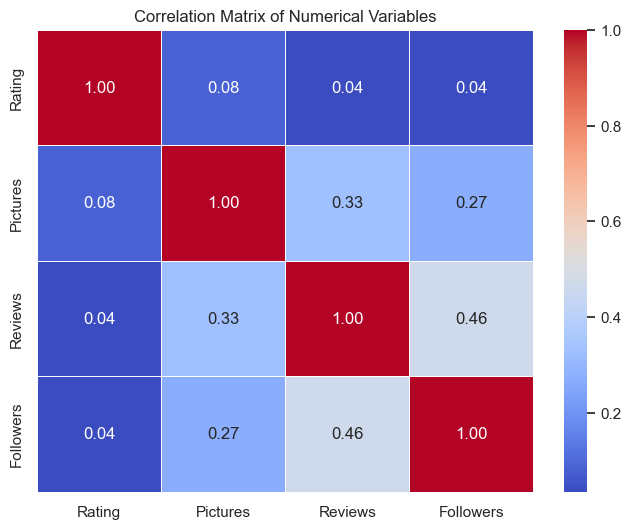

In [51]:
numerical_cols = ['Rating', 'Pictures', 'Reviews', 'Followers']
corr_matrix = df2[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

### Top 5 Restaurants By Year

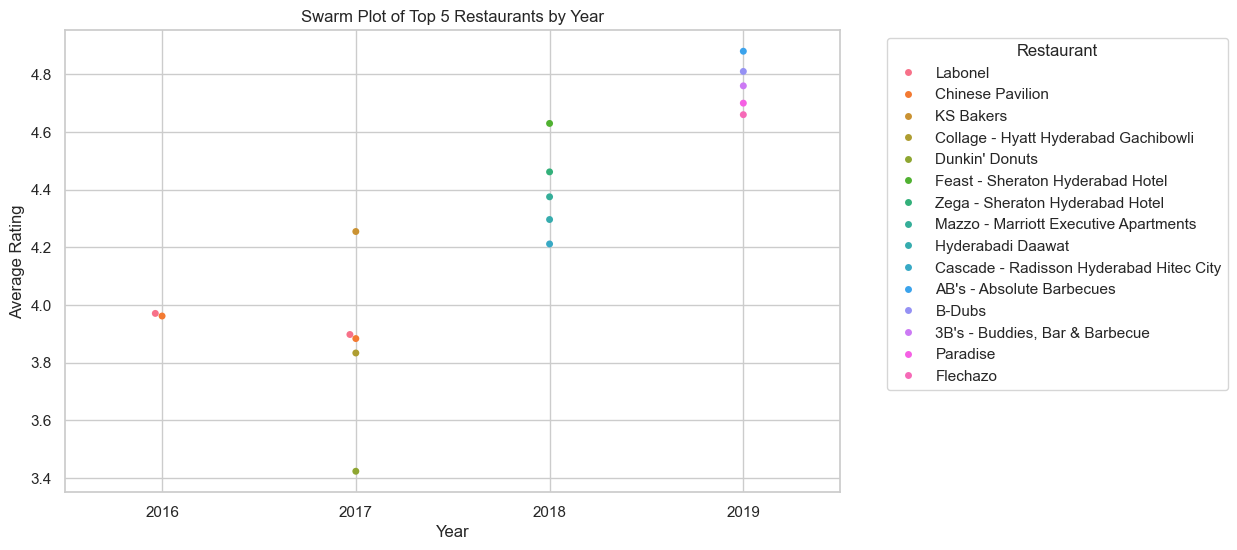

In [52]:
grouped_data = df2.groupby(['Year', 'Restaurant'])['Rating'].mean().reset_index()
top_5_restaurants = grouped_data.groupby('Year').apply(lambda x: x.nlargest(5, 'Rating')).reset_index(drop=True)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))  # Adjusted figure size
swarm_plot = sns.swarmplot(data=top_5_restaurants, x='Year', y='Rating', hue='Restaurant')
swarm_plot.legend_.remove()

plt.title('Swarm Plot of Top 5 Restaurants by Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
handles, labels = swarm_plot.get_legend_handles_labels()
plt.legend(handles, labels, title='Restaurant', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


### Average Rating of Restaurants for Each Year

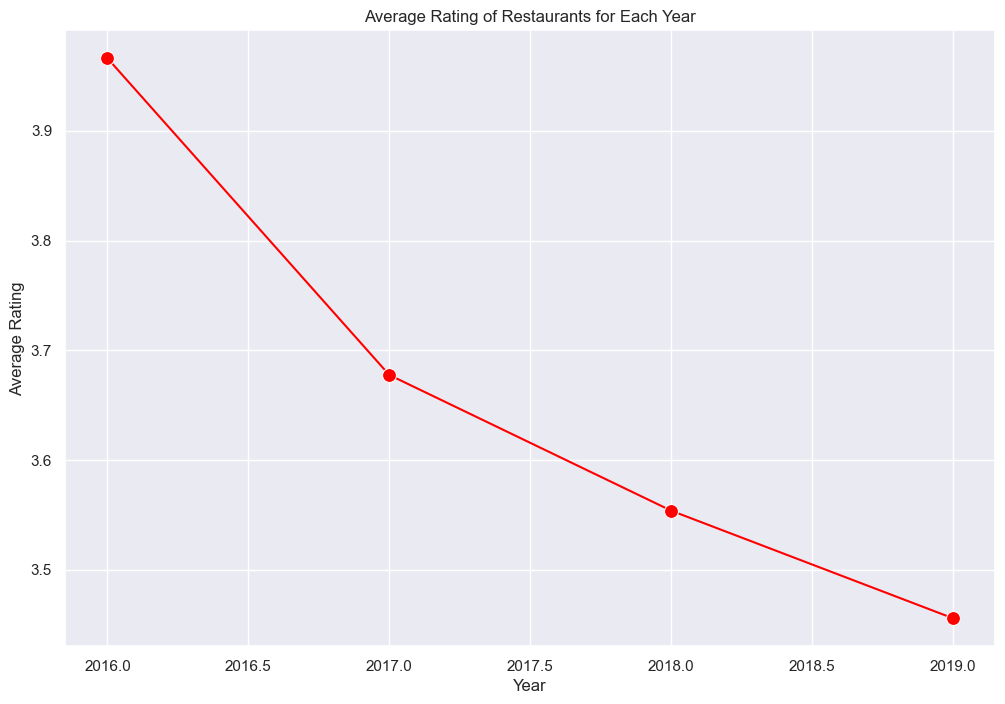

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df2' contains your DataFrame

# Group the data by 'Year' and 'Restaurant', calculate the average rating for each
grouped_data = df2.groupby(['Year', 'Restaurant'])['Rating'].mean().reset_index()

# Calculate the average rating for each year
average_rating_per_year = grouped_data.groupby('Year')['Rating'].mean().reset_index()

# Set the style to 'darkgrid'
sns.set(style="darkgrid")

# Create the line plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=average_rating_per_year, x='Year', y='Rating', marker='o', color='red', markersize=10)  # Increase markersize
plt.title('Average Rating of Restaurants for Each Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)

plt.show()


### Total Follower Count Over the Years

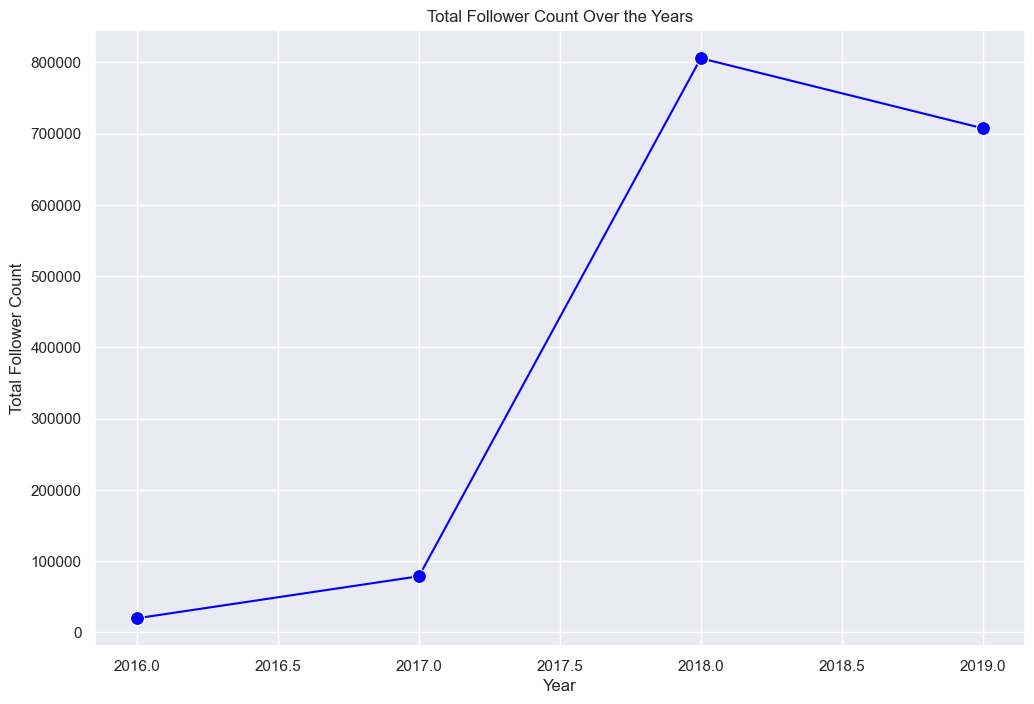

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
follower_count_per_year = df2.groupby('Year')['Followers'].sum().reset_index()
sns.set(style="darkgrid")
plt.figure(figsize=(12, 8))
sns.lineplot(data=follower_count_per_year, x='Year', y='Followers', marker='o', color='blue', markersize=10, palette="Reds_r")
plt.title('Total Follower Count Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Follower Count')
plt.grid(True)

# Show the plot
plt.show()


### Proportion of Average Ratings by Quarter

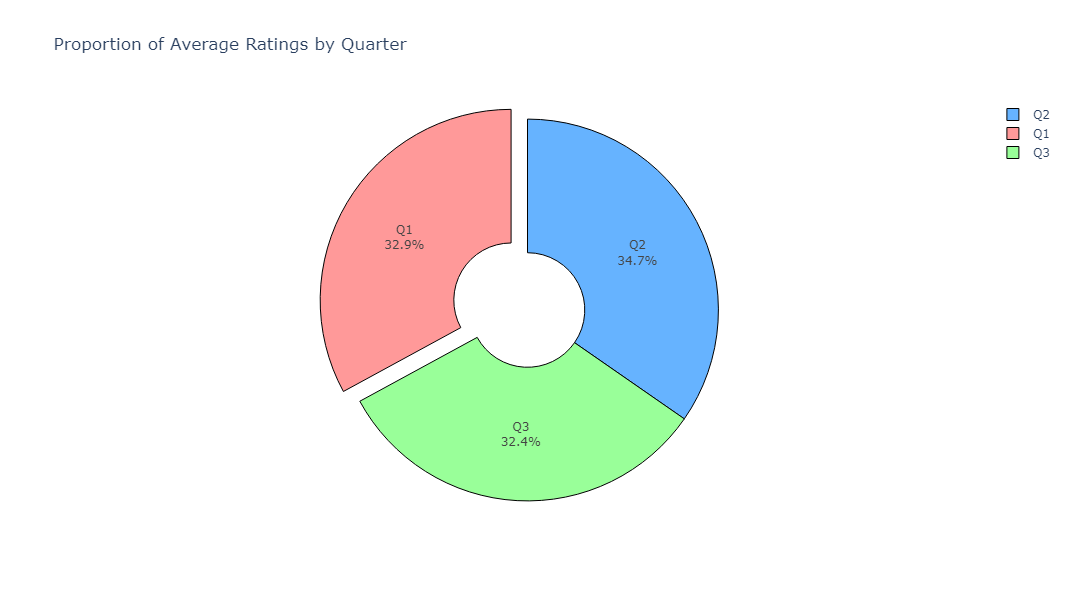

In [55]:
import plotly.graph_objs as go
avg_rating_by_quarter = df.groupby('Quarter')['Rating'].mean()
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
explode = (0, 0, 0.1, 0)
fig = go.Figure(data=[go.Pie(labels=avg_rating_by_quarter.index, 
                             values=avg_rating_by_quarter,
                             hole=0.3, 
                             pull=[0.1, 0, 0, 0], 
                             textinfo='percent+label',
                             marker=dict(colors=colors,
                                         line=dict(color='#000000', width=1)))])

fig.update_layout(width=800, height=600)
fig.update_layout(title_text="Proportion of Average Ratings by Quarter")
fig.show()

### Percentage of Reviews by Quarter

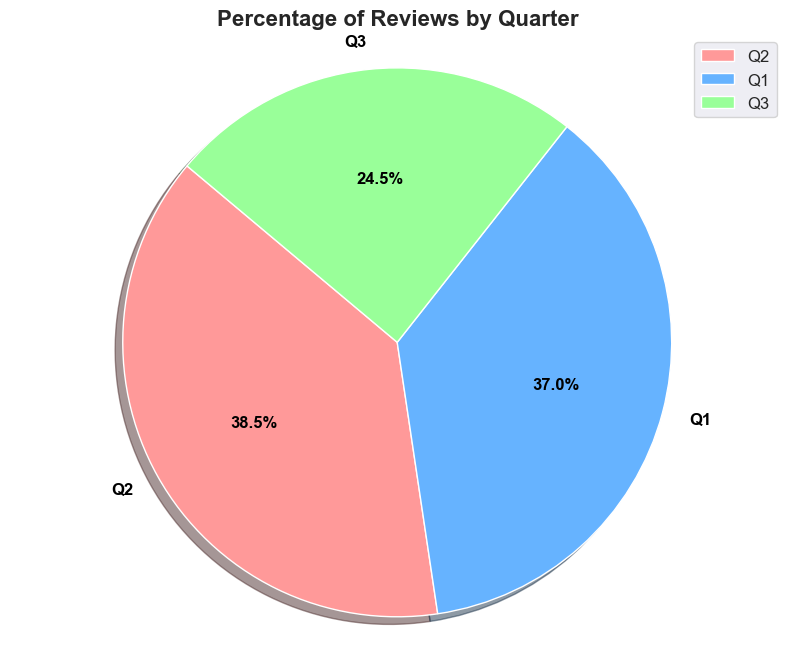

In [56]:
reviews_by_quarter = df['Quarter'].value_counts()
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
plt.figure(figsize=(10, 8))
patches, texts, autotexts = plt.pie(reviews_by_quarter, 
                                    labels=reviews_by_quarter.index, 
                                    colors=colors,
                                    autopct='%1.1f%%', 
                                    startangle=140,
                                    shadow=True,
                                    textprops={'fontsize': 12, 'color': 'black', 'weight': 'bold'})  # Adjust text properties

plt.title('Percentage of Reviews by Quarter', fontsize=16, weight='bold')
plt.axis('equal')  
plt.legend(reviews_by_quarter.index, loc='best', fontsize=12)

# Show the plot
plt.show()
